![](../../assets/header-logo.png)
# *A Comparative Study on YOLOv5-Based Traffic Light Recognition for Automated Driving*

**Automated and Connected Driving Challenges - Research Project - *09/2023***

**Research Topic *05: Traffic Light Detection***


| Author | Mail |
| --- | --- |
| *Kh Safkat Amin* | *safkat.amin@rwth-aachen.de / khsafkatamin@gmail.com* |


# Abstract 
__An accurate knowledge about traffic light states is vital for fully-automated driving in urban environments. If traffic lights were equipped with the right hard- and software, V2X communication would be a reasonable way of transmitting traffic light states to automated vehicles nearby. As a fallback to V2X solutions or in situations, where V2X is not supported, it is also desirable to have a perception function dedicated to detecting traffic lights and their current state from camera images.__

__To achieve this goal, this research used the fastest YOLOv5 architecture, yolov5s to both locate and classify traffic lights. Two of the most popular datasets BSTLD and DTLD were used. The results were then compared to those of previous studies in the field and reveals that it outperforms both SSD and R-CNN based detector. Additionally the study indicates that, models trained with the BSTLD dataset experience a substantial reduction in performance when tested on the DTLD dataset, whereas models trained on the DTLD dataset exhibit a more resilient performance profile overall, highlighting the critical influence of dataset selection on model generalization across diverse geographical regions. Limitations were acknowledged and discussed, shedding light on areas that require further examination and potential enhancements. Considerations were made regarding what worked well and what presented limitations.__

# Introduction

Detecting traffic lights might seem like a straightforward task, but in the world of computer vision, it's far from simple. Traffic lights are small and scattered across a vast field of view in a camera image. Some are close to the vehicle, others hidden in the far corners, and some aren't even relevant. Yet, these small lights hold immense importance in making driving decisions. Therefore, detecting and recognizing traffic lights accurately is crucial. In solving this computer vision task, two of the most common image processing approaches come to the forefront: 2D object detection using bounding boxes and semantic image segmentation. This research adopts the former technique, which essentially includes two primary tasks. Localization, which creates bounding boxes around regions of interest and classification, which categorizes the content within these designated boxes. 

For localization, there are some state of the art approaches like Faster R-CNN [<a href="#ref1">1</a>] , Single Shot MultiBox Detector(SSD) [<a href="#ref2">2</a>], and You Only Look Once(YOLO) [<a href="#ref3">3</a>]. R-CNNs use a two-stage process for object detection, SSDs are single-stage detectors that predict objects directly from feature maps, and YOLO employs a one-stage approach for real-time object detection by simultaneously predicting bounding boxes and class probabilities across a grid of cells. These methods have been remarkable but when it comes to traffic lights, it's tricky. They often show up as just a handful of pixels in an image, making them challenging to detect.On top of the detector models, a classifier model is run to recognize the state of the traffic lights. Most common classifier models are Mobilenet [<a href="#ref4">4</a>], Inceptionnet [<a href="#ref5">5</a>], Resnet [<a href="#ref6">6</a>] and VGG [<a href="#ref7">7</a>]

The YOLO family of models has gained widespread popularity, not just as a detector but also as a combined detector and classifier, owing to its user-friendly nature and resource efficiency, drawing the attention of numerous researchers. Among the YOLO variants, YOLOv5 [<a href="#ref8">8</a>] stands out as the most widely adopted due to its reputation for being both exceptionally fast and accurate. In our project, we chose to utilize the YOLOv5 model to assess its capabilities in addressing the challenge of traffic light detection.


But there's a challenge when working on computer vision tasks: finding good datasets. Currently, there are four publicly available traffic light datasets - *La Route Automatisee* (LaRA) Database [<a href="#ref9">9</a>], Vision for Intelligent Vehicles and Application challenge (VIVA) Traffic Light Database [<a href="#ref10">10</a>], Bosch Small Traffic Light Database (BSTLD) [<a href="#ref11">11</a>], and Driveu Traffic Light Dataset (DTLD) [<a href="#ref12">12</a>]. Among them both BSTLD and DTLD offer comprehensive and high-quality data suitable for traffic light detection tasks. So, we chose these two for our study. To compare them properly, we standardized their formats, given their differences between the USA-based BSTLD and German-based DTLD.


In summary, this study presents a comprehensive investigation into the detection and classification of traffic lights, utilizing the YOLOv5 architecture and comparative analysis with other computer vision methods

![](assets/DriveU-sample.jpg)

__Fig 1: Example of Traffic Light Dataset__

# Related Work

Early efforts in traffic light detection primarily relied on handcrafted features and rule-based systems. These methods often incorporated color-based segmentation and geometric heuristics to identify traffic lights within images [<a href="#ref13">13</a>]. In recent years, deep learning has revolutionized traffic light detection [<a href="#ref3">3</a>] [<a href="#ref14">14</a>] - [<a href="#ref16">16</a>]. Convolutional Neural Networks (CNNs) have emerged as a dominant architecture for this task due to their ability to automatically learn discriminative features from raw image data. To build a robust and effective real world application a complete system is highly required [<a href="#ref11">11</a>]. However, for this research a much simpler approach is adopted which is based on [<a href="#ref17">17</a>]. The author used both BSTLD and DTLD datasets in training traffic light detection models. The chosen models were SSD Mobilenet v1 and Faster RCNN Inception v2 and the author reveals that a model trained in one dataset performs fairly well on a similarly dataset with minimal loss in performance despite geographical differences. 


The primary objective of this study was to evaluate the performance of YOLOv5 in comparison to referred models, while also investigating potential challenges associated with its implementation. Furthermore, this research aimed to explore the impact of cross-regional dataset variations on model performance under similar conditions.

# Datasets
A great overview of publicly available datasets is given in [<a href="#ref12">12</a>]. The comparison of different metrics among the datasets reveals significant variations in annotation quality, completeness, consistency, class frequency, resolution, aspect ratio, and regional distribution. While the DriveU Traffic Light Dataset (DTLD) showcases superior attributes in various aspects when compared to the Bosch Small Traffic Light Database (BSTLD), both datasets offer a wealth of high-quality data. This diversity in dataset characteristics provides an excellent opportunity for rigorous testing and experimentation in the field of traffic light detection


#### Bosch Small Traffic Light Dataset

The Bosch Small Traffic Light Database (BSTLD) [<a href="#ref11">11</a>] is a dataset comprising 24,242 hand-labeled annotations from sequences recorded in the United States. The training set, consisting of 5,093 images, offers annotations at approximately 2-second intervals. It encompasses a total of 10,756 annotated traffic lights, exhibiting an average width and height of 11.2 and 24.2 pixels respectively. There are 15 distinct labels available for the annotated traffic lights and 170 lights in the training set are partially occluded recorded over 17 cities along El Camino Real in the San Francisco Bay Area in California.

In contrast, the test set comprises 8,334 consecutive images recorded in a single trip along University Avenue in Palo Alto, California, with annotations performed at a rate of about 15 frames per second. It consists 13,486 annotated traffic lights, with an average width and height of 9.4 and 26.7 pixels respectively. The test set characterizes traffic lights with four labels: red, yellow, green, and off. Additionally, 2,088 lights in the test set are partially occluded. Furthermore, an additional dataset consisting of 220 images enriches this comprehensive resource.

The train dataset comprises 13 possible states, although the test set only includes four states. The additional states are actually more specific versions of the four base states(e.g RedLeft, GreenStraightLeft). In this project, all the train data were relablled according to the base states (e.g RedLeft interpreted as red and GreenStraightLeft interpreted as green)

After conversion, summary of the dataset look as below-

| Dataset | Class  | Images | Instances |
|---------|--------|--------|-----------|
|__Train__| green  | 2113   | 5422      |
|         | red    | 2039   | 4164      |
|         | off    | 507    | 726       |
|         | yellow | 291    | 444       |
|         |__Total__|__3153__|__10756__ |
| __Valid__| green | 4504   | 7569      |
|         | red    | 3174   | 5321      |
|         | off    | 423    | 442       |
|         | yellow | 103    | 154       |
|         |__Total__| __8334__|__13486__|

__Table 1: Details about the BSTLD dataset split by training and test set__


![](assets/BSTLD_Example.png)

__Fig 2: Example from the BSTLD Dataset__

#### DriveU Traffic Light Dataset

The DriveU Traffic Light Dataset (DTLD) [<a href="#ref2">2</a>] is a comprehensive collection of camera images with 232,039 annotated traffic signals. The dataset was recorded in 11 German cities at a frame rate of 15 Hz, providing a high-resolution of 2 megapixels. It includes a wide range of label classes, totaling 344, due to the detailed annotation of light signal attributes such as orientation, relevance, status, and pictograms. In addition to the camera images, the dataset also provides disparity images for depth-based detection and evaluations.

DTLD stands out for its annotation capabilities at the resolution limit, allowing the annotation of objects as small as 5 pixels. This feature results in a large number of very small objects within the dataset, making it suitable for research in object recognition at extremely low resolutions. Moreover, the dataset exhibits a high variance in the aspect ratio of the annotated traffic signals, including various configurations with one, two, three, or four active light elements.

Another notable characteristic of DTLD is its high local variance, which refers to the distribution and position of annotations within the camera images. This variance is achieved by filtering out static scenes and including only scenes where at least one traffic light has changed its state.

DTLD consists five traffic light states (off, red, green, red_yellow and yellow). In USA based traffic light system there are no red_yellow states, the state yellow is simply used in the case of red_yellow scenario. And so to match with BSTLD, we simply relablled red_yellow as yellow.  

The DTLD dataset consists of 11 separate datasets, each corresponding to a different city. But there were no specific datasets as test dataset. To, match with setup of [<a href="#ref1">1</a>] the whole dataset was distributed with 70:30 ratio to create training and test dataset. However, as the dataset were build upon sequence of recordings, no shuffling was done to maintain the stream. In, addition, there were some labels labeled as "unknown". Those labels were also removed and the images that consisted only those unknown labels were removed as well.

After conversion, the final dataset look as below-

| Dataset | Class  | Images | Instances |
|---------|--------|--------|-----------|
|__Train__| green  | 21989  | 71498     |
|         | red    | 18539  | 54149     |
|         | off    | 7924   | 17579     |
|         | yellow | 4831   | 8896      |
|         |__Total__|__28656__|__151322__ |
| __Valid__| green | 9449   | 31786     |
|         | red    | 7704   | 22263     |
|         | off    | 2941   | 4334      |
|         | yellow | 1756   | 3118      |
|         |__Total__| __12294__|__61501__|

__Table 2: Details about the DTLD dataset split by training and test set__


![](assets/DTLD_Example.png)

__Fig 3: Example from the DTLD Dataset__

#### Downloads

The datasets can be downloaded from the following links:


- __BSTLD__: https://hci.iwr.uni-heidelberg.de/content/bosch-small-traffic-lights-dataset
- __DTLD__: https://www.uni-ulm.de/in/iui-drive-u/projekte/driveu-traffic-light-dataset/registrierungsformular-dtld/


# Model Architectures

Training was done using the open source framework [Ultralytics](https://github.com/ultralytics) with there [yolov5](https://github.com/ultralytics/yolov5) repository. These scripts implement a convenient way to take advantage of transfer learning and evaluating the resulting models. All the yolo architechtures with their various trainied models can be downloaded from there. 

A trade-off between speed and accuracy is always an important topic in automated driving. However, for simplicity only one model of YOLOv5 was used. In this case YOLO's fastest model, yolov5s was used. This model was trained with COCO dataset [<a href="#ref18">18</a>], which includes traffic lights as one of their 91 categories.

All the hyperparameters within Yolov5 were set as default to keep it simple. Yolov5s was trained with 640x640 input size. That is why an input size of 640 was also used for this experiment. So, the hyperparameters are as below-


**Hyperparameters:**

- Learning Rate (Initial): lr0 = 0.01
- Learning Rate (Final): lrf = 0.01
- Momentum: 0.937
- Weight Decay: 0.0005
- Warmup Epochs: 3.0
- Warmup Momentum: 0.8
- Warmup Bias Learning Rate: 0.1
- Box Loss Weight: 0.05
- Class Loss Weight: 0.5
- Class Loss Power: 1.0
- Object Loss Weight: 1.0
- Object Loss Power: 1.0
- IoU Threshold: 0.2
- Anchor T: 4.0
- Focal Loss Gamma: 0.0
- HSV Hue: 0.015
- HSV Saturation: 0.7
- HSV Value: 0.4
- Degrees: 0.0
- Translate: 0.1
- Scale: 0.5
- Shear: 0.0
- Perspective: 0.0
- Flip Up-Down: 0.0
- Flip Left-Right: 0.5
- Mosaic Augmentation: 1.0
- Mixup Augmentation: 0.0
- Copy-Paste Augmentation: 0.0



#### Data Format required for YOLO

In order to train a YOLO-based object detection model, it is essential to annotate the training dataset in a specific format that is compatible with the YOLO framework. Each annotation consists of a text file with the same name as the corresponding image file but with a `.txt` extension.

__Annotation__: Each line represents one object instance detected in the image and has the following format:
 
     <object-class> <x_center> <y_center> <width> <height>
where:

- `<object-class>` is the integer index or label of the object class.
- `<x_center>` and `<y_center>` are the normalized coordinates of the center of the bounding box, relative to the width and height of the image. These values range from 0.0 to 1.0.
- `<width>` and `<height>` are the normalized width and height of the bounding box, relative to the width and height of the image. These values also range from 0.0 to 1.0.



# Dependencies & Setup

##### Execution Environment

[yolov5](https://github.com/ultralytics/yolov5) repository contains the [requirements.txt](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) file which lists all the dependencies to train a YOLOv5. This also covers all the dependencies for this project. So Let's start with installing dependencies with the help of [requirements.txt](https://github.com/ultralytics/yolov5/blob/master/requirements.txt)

In [2]:
!pip install -qr yolov5/requirements.txt

## Necessary Imports

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import random
import glob
import yaml
import json
import shutil
from shutil import copyfile
from PIL import Image

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
random.seed(123)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

#### Setting Up Input Directories

This is where the input directories should be declared. If the dataset is formated in `.json` format, set the path to `JSON_DIR`. If its in `.yaml` format, set the path to `YAML_DIR`

`YOLO_DIR` will be where the converted images and labels are copied and stored for training.

Note: 
- `BASE_DIR` will be defined automatically where this notebook file is saved
- It is very important to define the path of the Data directories based on the `BASE_DIR` as the whole notebook is prepared based on this. 
- So, if the data path for the dataset is defined as `JSON_DIR`, the full path of the dataset will be `BASE_DIR/JSON_DIR`

In [4]:
if 'BASE_DIR' not in locals():
    BASE_DIR = os.path.abspath(os.getcwd()) + '/'
    
# Set the location of your Dataset here!
JSON_DIR = 'Dataset/COCO_JSON'
YAML_DIR = 'Dataset/PASCAL_VOC'
YOLO_DIR = 'Dataset/YOLO_TXT'
MODEL_DIR = 'yolov5/'

#print(f"Base directory : {BASE_DIR}")
#print(f"JSON directory : {BASE_DIR}/{JSON_DIR}")
#print(f"YANL directory : {BASE_DIR}/{YAML_DIR}")
#print(f"YOLO directory : {BASE_DIR}/{YOLO_DIR}")
#print(f"Model directory : {BASE_DIR}/{MODEL_DIR}")

# Data Preparation For YOLOv5
Let's now convert the datasets in the desired yolo.txt format.

#### Setting up Classes

It is very important to define the classes that are going to be used, specifically if multiple datasets are used and annotation syntaxes are different. Also, note that yolo label index will follow the index of `class_names` variable.

As mentioned earlier, all states will be converted to the four base states. So, `class_names` is defined as below- 

*Note: `class_names` can only be used as [ ] incase the model is used only for detection*

In [5]:
# Usage:
# For object detection with a single class:
#class_names = []

# For object detection with multiple classes:
class_names = ["off", "red", "yellow", "green"]

#### Setting up Output Directories for YOLO TXT

The following cell will create the directories and subdirectories required for YOLO format. 

Please set the `clean_directory` variable to __True__ when a fresh start is preferred.

In [6]:
# Set this to True if you want to clean the directory, or False if you want to keep it as-is.
clean_directory = False

output_dir = os.path.join(BASE_DIR, YOLO_DIR)
subdirectories = ["train", "valid", "test"]
sub_subdirectories = ["images", "labels"]

# Create the output directories if they don't exist
for subdirectory in subdirectories:
    for sub_subdirectory in sub_subdirectories:
        path = os.path.join(output_dir, subdirectory, sub_subdirectory)
        os.makedirs(path, exist_ok=True)

# Clean the directory if clean_directory is True
if clean_directory:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            file_path = os.path.join(root, file)
            os.remove(file_path)
    print("Directory cleaned.")

print("Directories are ready.")


Directories are ready.


#### Helper Functions for JSON to YOLOv5 Conversion

These helper functions will convert the annotations from `COCO_JSON` format to `YOLO_TXT` format and make ready for training.

Notes:
- `json_to_yolo_bbox()` converts the bounding boxes into `yolo_txt` format
- `get_json_label_index()` basically filters the labels. For my case, it relabels `red_yellow` to `yellow`. It can also handle case sensitive issues in labeling.
- As mentioned earlier that we will only work with certain attributes of the DTLD dataset, those attributes are also filtered inside the `json_data_split()` function
- Finally the `process_json_dataset()` calls the helper functions and splits into train, valid and test dataset with a defined split ratio.

In [7]:
def json_to_yolo_bbox(bbox, w, h):
    # Convert JSON format bbox to YOLO format bbox
    x_center = ((bbox["x"] + bbox["x"] + bbox["w"]) / 2) / w
    y_center = ((bbox["y"] + bbox["y"] + bbox["h"]) / 2) / h
    width = bbox["w"] / w
    height = bbox["h"] / h
    return [x_center, y_center, width, height]

def get_json_label_index(label, class_names):
    
    if not class_names:
        return 0  # Use a single class index when class_names is empty
    
    label = label.lower()
    
    # Create a dictionary to store the class name and its index
    class_name_to_index = {name.lower(): i for i, name in enumerate(class_names)}
    
    # Check if the label exactly matches a class name
    if label in class_name_to_index:
        return class_name_to_index[label]
    
    # Special handling for "red_yellow" as "red"
    if "red_yellow" in label:
        return class_name_to_index["yellow"]
    
    # Check if the label contains a substring that matches a class name
    for name in class_names:
        if name.lower() in label:
            return class_name_to_index[name.lower()]
    
    # If no match is found, return None
    return None


def json_data_split(split_data, label_dir, image_dir):
    for image in split_data:
        image_path = image["image_path"]
        image_name = os.path.splitext(os.path.basename(image_path))[0]

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"{image_name} image does not exist!")
            continue

        result = []

        # Process each label in the image
        for label in image["labels"]:
            attributes = label["attributes"]
            
            # Check if the "aspects" attribute matches "three_aspects" when filtering
            #if attributes.get("aspects") != "three_aspects":
            #    continue
                
            # Check if the "pictogram" attribute is one of the allowed values
            #pictogram = attributes.get("pictogram")
            #if pictogram not in ["circle", "arrow_left", "arrow_right", "arrow_straight"]:
            #    continue

            
            bbox = {
                "x": label["x"],
                "y": label["y"],
                "w": label["w"],
                "h": label["h"]
            }
            label_name = attributes["state"]

            class_index = get_json_label_index(label_name, class_names)
            if class_index is None:
                continue
            
            # Get the width and height from the image file
            image = Image.open(image_path)
            image_width, image_height = image.size
            
            yolo_bbox = json_to_yolo_bbox(bbox, image_width, image_height)
            bbox_string = " ".join(map(str, yolo_bbox))
            result.append(f"{class_index} {bbox_string}")

        if result:
            # Generate a YOLO format text file for each image
            with open(os.path.join(label_dir, f"{image_name}.txt"), "w", encoding="utf-8") as f:
                f.write("\n".join(result))
            
            
            # Convert the image to the desired format (e.g., .jpg)
            target_image_format = 'JPEG'
            converted_image_path = os.path.join(image_dir, f"{image_name}.{target_image_format.lower()}")
            image.save(converted_image_path, format=target_image_format.lower())

def process_json_dataset(json_files):

    for input_file in json_files:
        with open(input_file, "r") as f:
            dataset = json.load(f)
        
        print(f"Found {input_file}, Processing starts... ")
        
        # Split the dataset into train/validation/test
        train_data = dataset["images"][:int(0.7 * len(dataset["images"]))]
        valid_data = dataset["images"][int(0.7 * len(dataset["images"])):int(1.0 * len(dataset["images"]))]
        #test_data = dataset["images"][int(0.7 * len(dataset["images"])):]

        # Process each split
        json_data_split(train_data, os.path.join(output_dir, "train", "labels"), os.path.join(output_dir, "train", "images"))
        json_data_split(valid_data, os.path.join(output_dir, "valid", "labels"), os.path.join(output_dir, "valid", "images"))
        #json_data_split(test_data, os.path.join(output_dir, "test", "labels"), os.path.join(output_dir, "test", "images"))
        
        print(f"Processing finished of {input_file}")



#### JSON to YOLOv5 Conversion

Set `JSON = True` if you want to proceed to the conversion.

Note:
- The cell runs through all the `.json` file it finds within the `JSON_DIR` one by one.

In [8]:
%cd {BASE_DIR}/{JSON_DIR}
JSON = False

if JSON == True:
    # Call the process_dataset function with a list of JSON files
    json_files = [file for file in os.listdir() if file.endswith('.json')]

    if not json_files:
        print("No JSON file found in the current directory!")
    else:
        process_json_dataset(json_files)
        
print("Dataset processing complete!")

[Errno 2] No such file or directory: '/home/jovyan/acdc/reports/05-Traffic-Light-Detection//Dataset/COCO_JSON'
/home/jovyan/acdc/reports/05-Traffic-Light-Detection
Dataset processing complete!


#### Helper Functions for YAML to YOLOv5 Conversion
These helper functions will convert the annotations from `PASCAL_VOC` format to `YOLO_TXT` format and make ready for training.

Notes:
- `yaml_to_yolo_bbox()` converts the bounding boxes into `yolo_txt` format
- `get_yaml_label_index()` basically filters the labels. For BSTLD, e.g. it relabels `RedLeft` to `red`. It can also handle case sensitive issues in labeling.
- `yaml_data_split()` helps split the dataset. It can also filter out the empty labelings.
- Finally the `process_yaml_dataset()` calls the helper functions and splits into train, valid and test dataset with a defined split ratio. For BSTLD, as there was already a seprate test dataset, we skipped the test split here and manually copied the test set into the required destination

*For BSTLD dataset, both train and test sets were converted separately. please adjust the split ratio accordingly in similar case*

In [9]:

def yaml_to_yolo_bbox(bbox, w, h):
    # Convert YAML format bbox to YOLO format bbox
    x_center = ((bbox["x_max"] + bbox["x_min"]) / 2) / w
    y_center = ((bbox["y_max"] + bbox["y_min"]) / 2) / h
    width = (bbox["x_max"] - bbox["x_min"]) / w
    height = (bbox["y_max"] - bbox["y_min"]) / h
    return [x_center, y_center, width, height]

def get_yaml_label_index(label, class_names):
    
    if not class_names:
        return 0  # Use a single class index when class_names is empty
    
    label = label.lower()
    
    # Create a dictionary to store the class name and its index
    class_name_to_index = {name.lower(): i for i, name in enumerate(class_names)}
    
    # Check if the label exactly matches a class name
    if label in class_name_to_index:
        return class_name_to_index[label]
    
    # Check if the label contains a substring that matches a class name
    for name in class_names:
        if name.lower() in label:
            return class_name_to_index[name.lower()]
    
    # If no match is found, return None
    return None


def yaml_data_split(split_data, label_dir, image_dir):
    for image_info in split_data:
        image_path = image_info["path"]
        image_name = os.path.splitext(os.path.basename(image_path))[0]

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"{image_name} image does not exist!")
            continue

        result = []

        # Process each label in the image
        for bbox in image_info.get("boxes", []):
            label_name = bbox.get("label")
            if label_name is None:
                #result.append("") #uncomment this line if you don't want to filter empty labels
                continue
            class_index = get_yaml_label_index(label_name, class_names)
            if class_index is None:
                continue
            
            image = Image.open(image_path)
            image_width, image_height = image.size

            yolo_bbox = yaml_to_yolo_bbox(bbox, image_width, image_height)
            bbox_string = " ".join(map(str, yolo_bbox))
            result.append(f"{class_index} {bbox_string}")

        if result:
            # Generate a YOLO format text file for each image
            with open(os.path.join(label_dir, f"{image_name}.txt"), "w", encoding="utf-8") as f:
                f.write("\n".join(result))

            # Convert the image to the desired format (e.g., .jpg)
            target_image_format = 'JPEG'
            converted_image_path = os.path.join(image_dir, f"{image_name}.{target_image_format.lower()}")
            image.save(converted_image_path, format=target_image_format.lower())
            
            

def process_yaml_dataset(yaml_files):
    
    for input_file in yaml_files:
        with open(input_file, "r") as f:
            yaml_data = yaml.safe_load(f)
            
        print(f"Found {input_file}, Processing starts... ")

        # Split the dataset into train/validation/test            
        train_data = yaml_data[:int(1.0 * len(yaml_data))]
        #valid_data = yaml_data[int(0.8 * len(yaml_data)):int(1.0 * len(yaml_data))]
        #test_data = yaml_data[int(1.0 * len(yaml_data)):]

    
        # Process each split
        yaml_data_split(train_data, os.path.join(output_dir, "train", "labels"), os.path.join(output_dir, "train", "images"))
        #yaml_data_split(valid_data, os.path.join(output_dir, "valid", "labels"), os.path.join(output_dir, "valid", "images"))
        #yaml_data_split(test_data, os.path.join(output_dir, "test", "labels"), os.path.join(output_dir, "test", "images"))
        
        print(f"Processing finished of {input_file}")


#### PASCAL VOC to YOLOv5 Conversion

Set `YAML = True` if you want to proceed to the conversion.

Note:
- The cell runs through all the `.yaml` file it finds within the `YAML_DIR` one by one.

In [10]:
%cd {BASE_DIR}/{YAML_DIR}
YAML = False

if YAML == True:
    # Load the YAML file
    yaml_files = [file for file in os.listdir() if file.endswith('.yaml')]
    
    if not yaml_files:
        print("No YAML file found in the current directory!")
    else:
        process_yaml_dataset(yaml_files)

        
print("Dataset processing complete!")

[Errno 2] No such file or directory: '/home/jovyan/acdc/reports/05-Traffic-Light-Detection//Dataset/PASCAL_VOC'
/home/jovyan/acdc/reports/05-Traffic-Light-Detection
Dataset processing complete!


#### Dataset Summary

Run the below cell to show the summary of the dataset stored in the current `YOLO_DIR`

In [11]:
def count_class_instances(dataset_dir, class_names):
    splits = ["train", "valid", "test"]

    for split in splits:
        label_dir = os.path.join(dataset_dir, split, "labels")

        class_counts = {}

        # Count the total number of images in the image directory
        image_dir = os.path.join(dataset_dir, split, "images")
        total_images = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])

        for label_file in os.listdir(label_dir):
            label_path = os.path.join(label_dir, label_file)

            with open(label_path, "r") as f:
                labels = f.readlines()

            image_classes = set()  # To keep track of classes in each image

            for line in labels:
                parts = line.strip().split()
                class_index = int(parts[0])
                #class_name = class_names[class_index]
                # Check if class_names is empty, if so, use a default class name
                class_name = class_names[class_index] if class_names else "object"


                if class_name not in class_counts:
                    class_counts[class_name] = {"images": set(), "instances": 0}

                image_classes.add(class_name)
                class_counts[class_name]["instances"] += 1

            for class_name in image_classes:
                class_counts[class_name]["images"].add(label_file)

        print(f"Summary for {split} dataset:")
        print(f"{'Class':<10} {'Images':<10} {'Instances':<10}")
        print("-" * 30)
        
        total_instances = 0

        for class_name, counts in class_counts.items():
            images = len(counts["images"])
            instances = counts["instances"]

            print(f"{class_name:<10} {images:<10} {instances:<10}")

            total_instances += instances

        print(f"{'Total':<10} {total_images:<10} {total_instances:<10}")
        print("\n")


        
dataset_directory = os.path.join(BASE_DIR, YOLO_DIR)

count_class_instances(dataset_directory, class_names)


Summary for train dataset:
Class      Images     Instances 
------------------------------
green      2113       5422      
red        2039       4164      
off        507        726       
yellow     291        444       
Total      3153       10756     


Summary for valid dataset:
Class      Images     Instances 
------------------------------
red        3174       5321      
green      4504       7569      
off        423        442       
yellow     103        154       
Total      8334       13486     


Summary for test dataset:
Class      Images     Instances 
------------------------------
Total      0          0         




#### Gerneratation of data.yaml file

A data.yaml file is required to train with `YOLOv5`. The following cell creates the yaml file based on the `YOLO_TXT` directory and `class_names` file. 


In [12]:
data_file = os.path.join(BASE_DIR, YOLO_DIR, "data.yaml")

# Define a default class name for object detection when class_names is empty
default_class_name = "object"

# Generate the data.yaml file
data = {
    "train": f"{os.path.abspath(os.path.join(output_dir, 'train'))}/",
    "val": f"{os.path.abspath(os.path.join(output_dir, 'valid'))}/",
    "test": f"{os.path.abspath(os.path.join(output_dir, 'test'))}/",
    "nc": len(class_names) if class_names else 1,  # Use 1 as the default if class_names is empty
    "names": class_names if class_names else [default_class_name]  # Use default_class_name if class_names is empty
}

with open(data_file, "w") as f:
    yaml.dump(data, f)


# Data Structure for YOLO

The Dataset in finally ready for training. The `YOLO_DIR` directory should now look like this:

```
├── data.yaml
├── test
│   ├── images
│   └── labels
├── train
│   ├── images
│   └── labels
└── valid
    ├── images
    └── labels

```


And the `data.yaml` should look similar like below-

```yaml
names:
- 'off'
- red
- yellow
- green
nc: 4
test: /home/jovyan/acdc/topics/05-Traffic-Light-Detection/Dataset/YOLO_TXT/test/
train: /home/jovyan/acdc/topics/05-Traffic-Light-Detection/Dataset/YOLO_TXT/train/
val: /home/jovyan/acdc/topics/05-Traffic-Light-Detection/Dataset/YOLO_TXT/valid/
```

The following functions helps setting up data structure. It works as follows-

- It first creates train/valid/test directories and there sub-directories if they do not exist.
- Then it reads the data from the Dataset directory and copies them into train/valid/test folders as per split ratio with the help of `copy_files()` function
- The `generate_data_yaml()` function helps create the `data.yaml` file


# Data Visualization
Before moving into the training part, let's do some visualization of our data. Thanks to the blogpost [<a href="#ref19">19</a>] the final dataset can be easily visualized with the helper functions.


The current annotations in the text files are in normalized `[x_center, y_center, width, height]` format. The following function converts it back to `[x_min, y_min, x_max, y_max]` format.

In [13]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

Here the following steps are done-

- First, bounding boxes are converted using `yolo2bbox()` function
- As the YOLO bounding boxes are normalized data, to get the actual coordinates, it needs to be multiplied by actual image height and width. which is done in the next step.
- Finally `cv2.rectangle()` function is used to draw bounding boxes



The variable `colors` is defined to visualize each of the class_name with different colors

In [14]:
colors = np.random.uniform(0, 255, size = (len(class_names), 3))

In [15]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name, 
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

Finally, the `plot()` function calls in the images and labels files and sets up pyplot environment to visualize the data

In [16]:
 # Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()  

Let's now visualize some of the data.

/home/jovyan/acdc/reports/05-Traffic-Light-Detection/Dataset/YOLO_TXT


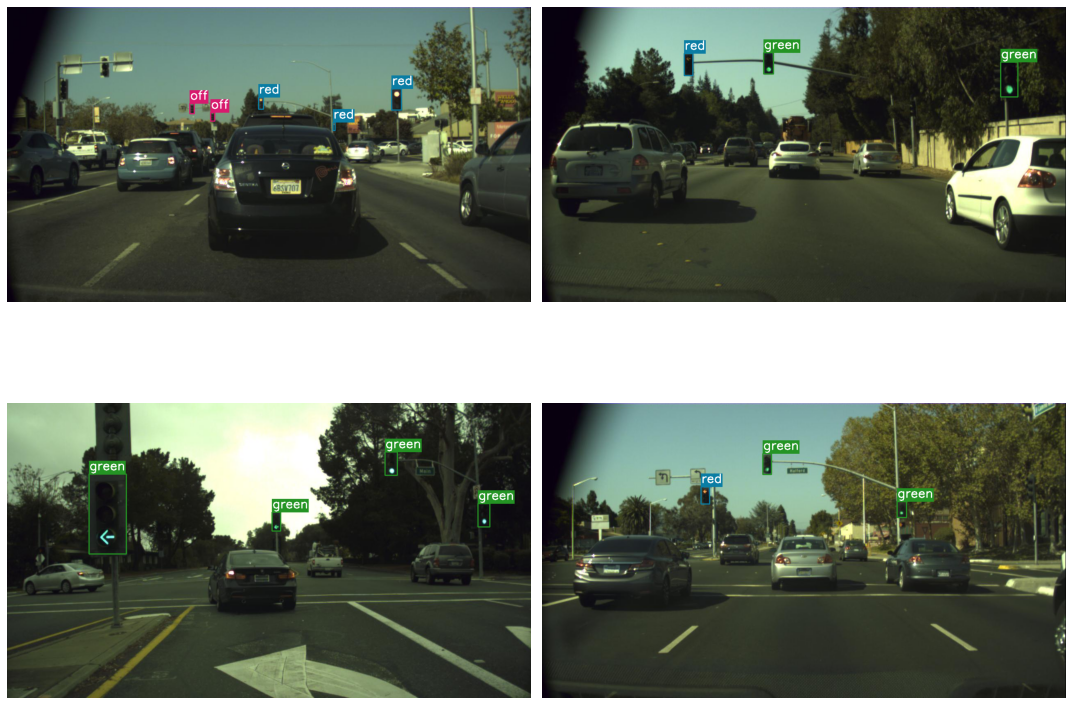

In [17]:
%cd {BASE_DIR}/{YOLO_DIR}

plot(
    image_paths='train/images/*',
    label_paths='train/labels/*',
    num_samples = 4,
)

# Training

####  Helper Functions for Logging
Before training we will setup some helper functions to store the result and perform inference, again with the help of blogpost [<a href="#ref19">19</a>]. The `set_res_dir()` function sets the directory name for storing results. It follows the convention of naming the result directories as "results_1", "results_2", and so on.

In [18]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

#### Hyperparameters and Constants
Here, it defined wether to train the model or not and for how many epochs to train for.
If __TRAIN = False__, then the last trained model will be used for inference in the notebook if run end to end.

In [19]:
TRAIN = False
EPOCHS = 64
IMG_SIZE = 640
BATCH_SIZE = 1

#### Train a Small (yolov5s) Model
Training all the layers of the yolov5s(small) model.
- The python script`train.py` is provided by the YOLOv5
- It follows by providing the path to `data.yaml` file. (*note: data.yaml file and the dataset directories should be in the same directory of the notebook file*)
- Next the path to the pretrained model on which it will train
- Finally the input image shape, number of epochs, batch size and directory where the result will be saved.


In [20]:
%cd {BASE_DIR}/{MODEL_DIR}

RES_DIR = set_res_dir()
if TRAIN:
    !python train.py --data {output_dir}/data.yaml --weights yolov5s.pt \
    --img {IMG_SIZE} --epochs {EPOCHS} --batch-size {BATCH_SIZE} --name {RES_DIR}

/home/jovyan/acdc/reports/05-Traffic-Light-Detection/yolov5
Current number of result directories: 1


#### Testing on Validation Dataset

To test any models with any dataset, use the `val.py` function below- 

*Note the `train.py` automatically calls `val.py` while training and validates on valid set. When validating with different dataset, this below code block was used. Change {RES_DIR} according incase needed.*

In [21]:
#%cd {BASE_DIR}/{MODEL_DIR}

#!python val.py --weights runs/train/{RES_DIR}/weights/best.pt --data {output_dir}/data.yaml --verbose


#### Check Out the Validation Predictions and Inference

In this section, we will check out the predictions of the validation images saved during training. Along with that, we will also check out inference of images and videos.

#### Visualization and Inference Utilities

We will visualize the validation prediction images that are saved during training. The following is the function for that.


In [22]:
# Function to show validation predictions saved during training.
def show_valid_results(RES_DIR):
    !ls runs/train/{RES_DIR}
    EXP_PATH = f"runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*.png")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(9, 8))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

The following functions are for carrying out inference on images and videos.

In [23]:
# Helper function for inference on images.
def inference(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights runs/train/{RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR}
    return INFER_DIR

We may also need to visualize images in any of the directories. The following function accepts a directory path and plots all the images in them. 

In [24]:
def visualize(INFER_DIR):
# Visualize inference images.
    INFER_PATH = f"runs/detect/{INFER_DIR}"
    infer_images = glob.glob(f"{INFER_PATH}/*.jpg")
    print(infer_images)
    for pred_image in infer_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

#### Visualize validation prediction images.


confusion_matrix.png				   results.png
events.out.tfevents.1693659085.ff5aed294b88.153.0  train_batch0.jpg
F1_curve.png					   train_batch1.jpg
hyp.yaml					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
opt.yaml					   val_batch1_labels.jpg
P_curve.png					   val_batch1_pred.jpg
PR_curve.png					   val_batch2_labels.jpg
R_curve.png					   val_batch2_pred.jpg
results.csv					   weights
['runs/train/results_1/R_curve.png', 'runs/train/results_1/results.png', 'runs/train/results_1/PR_curve.png', 'runs/train/results_1/confusion_matrix.png', 'runs/train/results_1/F1_curve.png', 'runs/train/results_1/P_curve.png']


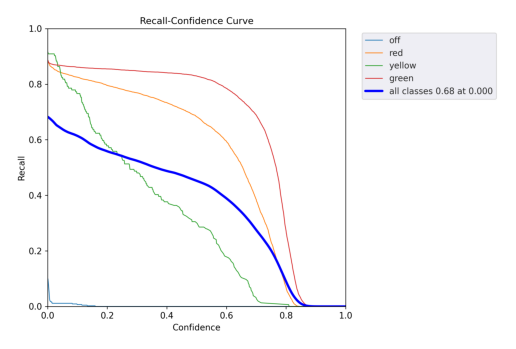

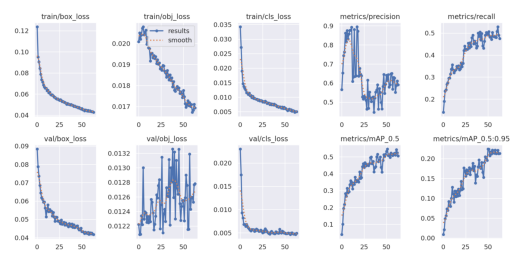

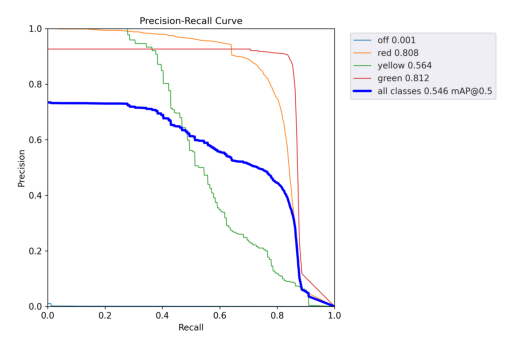

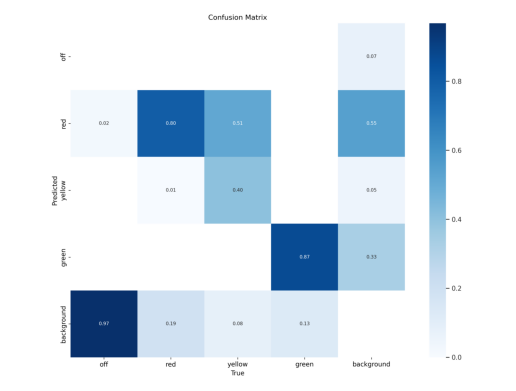

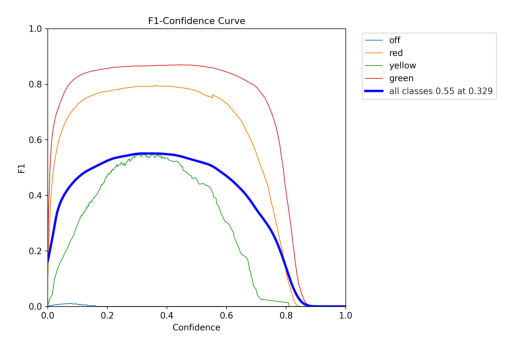

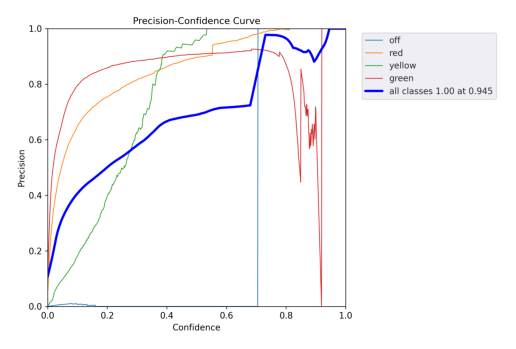

In [25]:
show_valid_results(RES_DIR)

#### Inference

With this section, inference can be tested. change the `RES_DIR` incase other models to be tested

In [26]:
%cd {BASE_DIR}/{MODEL_DIR}

Inference_path = '../Inference/Images'

# Inference on images.
IMAGE_INFER_DIR = inference(RES_DIR, Inference_path)

/home/jovyan/acdc/reports/05-Traffic-Light-Detection/yolov5
Current number of inference detection directories: 1
inference_2
detect: weights=['runs/train/results_1/weights/best.pt'], source=../Inference/Images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=inference_2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-10-23 Python-3.9.6 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /home/jovyan/acdc/reports/05-Traffic-Light-Detection/Inference/Images/PXL_20230624_070147181.TS_exported_0~2.jpg: 384x640 2 greens, 44.5ms
image 2/3 /home/jovyan/acdc/reports/05-Traffic-Light-Detection/Inference/Images/PXL_2023062

['runs/detect/inference_2/PXL_20230624_070147181.TS_exported_0~2.jpg', 'runs/detect/inference_2/PXL_20230624_070147181.TS_exported_20173.jpg', 'runs/detect/inference_2/PXL_20230624_070147181.TS_exported_17606.jpg']


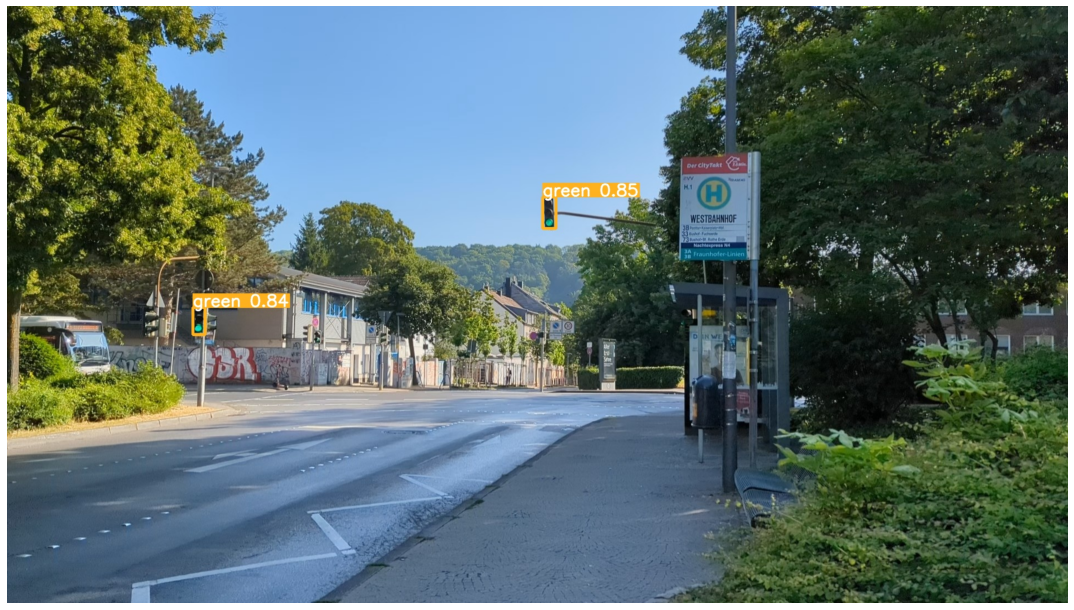

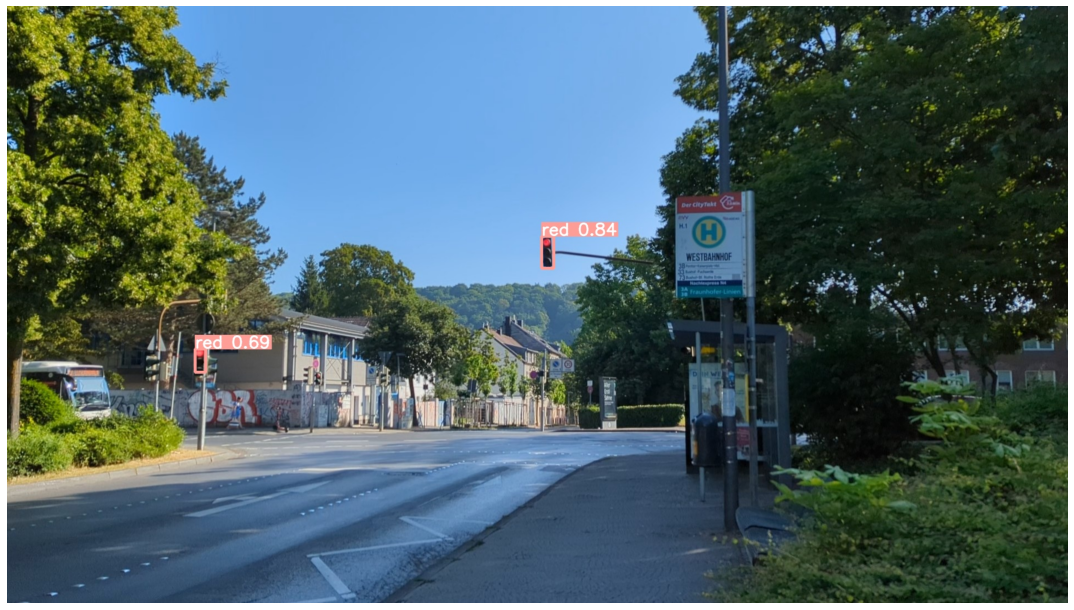

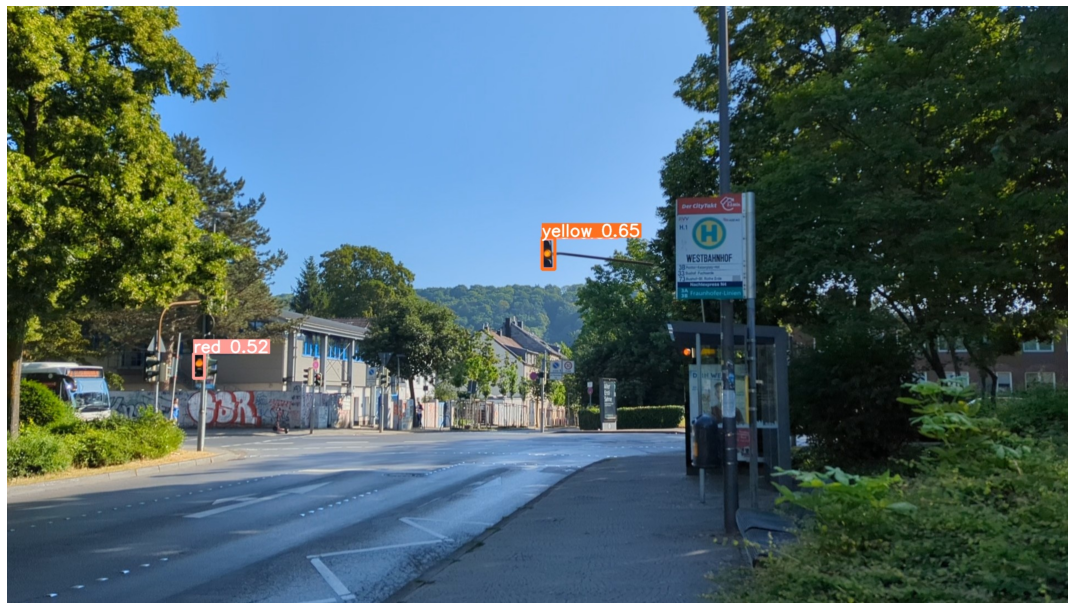

In [27]:
visualize(IMAGE_INFER_DIR)

# Experiments

As we already know, number of images and annotation in DTLD is quite higher than that of BSTLD, obviously DTLD will perform better if both models are trained for equal no. of epochs. To solve this, the author in [<a href="#ref17">17</a>] in his research set the global step to 200 000 and trained the dataset with two different batch sizes (1 and 4). As quote in the paper "Global steps is Tensorflow terminology for number of batches seen (respectively number of weight updates) during training. The number of epochs is therefor the product of batch size and global steps divided by the number of images in the training set." 
So,


$$ Epochs = \frac{{\text{{batch size}} \cdot \text{{global step}}}}{{\text{{number of images in training set}}}} $$



# Results

A total of 4 models were trained and tested on each of the test datasets comprising a total of 8 results.



| # | Train Data | Model   | Test Data | Batch Size | Weighted mAP | mAP   | mAP@0.5 | mAP@0.5:0.95 |off (mAP)| Green (mAP)| Yellow (mAP) | Red (mAP) | Box Loss | Obj Loss | Cls Loss | Epochs |
| -------------- | ---------- | ------- | --------- | ---------- | ------------ | ----- | ------- | ------------- | ----- | --------- | ----------- | -------  | -------- | ---------| ------- | ------ |
| 1              | BSTLD      | yolov5s | BSTLD     | 1          | 0.8357       | 0.608 | 0.546   | 0.224         | 0     | 0.889 | 0.71   | 0.833  | 0.04265  | 0.01694  | 0.005001 | 64     |
| 2              | BSTLD      | yolov5s | BSTLD     | 4          | 0.8016       | 0.624 | 0.541   | 0.27          | 0     | 0.857 | 0.853  | 0.788  | 0.03747  | 0.01405  | 0.001667 | 206(254) |
| 3              | BSTLD      | yolov5s | DTLD      | 1          | 0.49         | 0.383 | 0.179   | 0.0425        | 0.0227 | 0.604 | 0.487  | 0.42  | 0.04265  | 0.01694  | 0.005001 | 64     |
| 4              | BSTLD      | yolov5s | DTLD      | 4          | 0.4772       | 0.397 | 0.185   | 0.048         | 0.105  | 0.577 | 0.501  | 0.405 | 0.03747  | 0.01405  | 0.001667 | 206(254) |
| 5              | DTLD       | yolov5s | DTLD      | 1          | 0.8079       | 0.702 | 0.46    | 0.243         | 0.466  | 0.865 | 0.662  | 0.814 | 0.05503  | 0.02164  | 0.01224  | 7      |
| 6              | DTLD       | yolov5s | DTLD      | 4          | 0.8556       | 0.74  | 0.506   | 0.297         | 0.437  | 0.913 | 0.739  | 0.872 | 0.04761  | 0.01791  | 0.006521 | 28     |
| 7              | DTLD       | yolov5s | BSTLD     | 1          | 0.8913(0.85)       | 0.717(0.467) | 0.395   | 0.171         | 1(0)   | 0.913 | 0.079  | 0.875  | 0.05503  | 0.02164  | 0.01224  | 7      |
| 8              | DTLD       | yolov5s | BSTLD     | 4          | 0.8580       | 0.488 | 0.462   | 0.202         | 0.0116 | 0.907 | 0.154  | 0.879 | 0.04761  | 0.01791  | 0.006521 | 28     |

*Note: in experiment 7, mAP was corrected with the corrected value inside ( ). all other values were automatically calculated by `val.py` script*

__Table 3: Testing results__

*Please note, the experiment numbers denoted here are also used to denote other evaluation matrices as well*


__All the resulting data for these 8 experiments are stored in the following directorty__

absolute path: `/home/amin/project/acdc-research-project-ss23/topics/05-Traffic-Light-Detection/Evaluation`


#### Train History:

The following code shows all the metrics vs epochs curve

/home/jovyan/acdc/topics/05-Traffic-Light-Detection


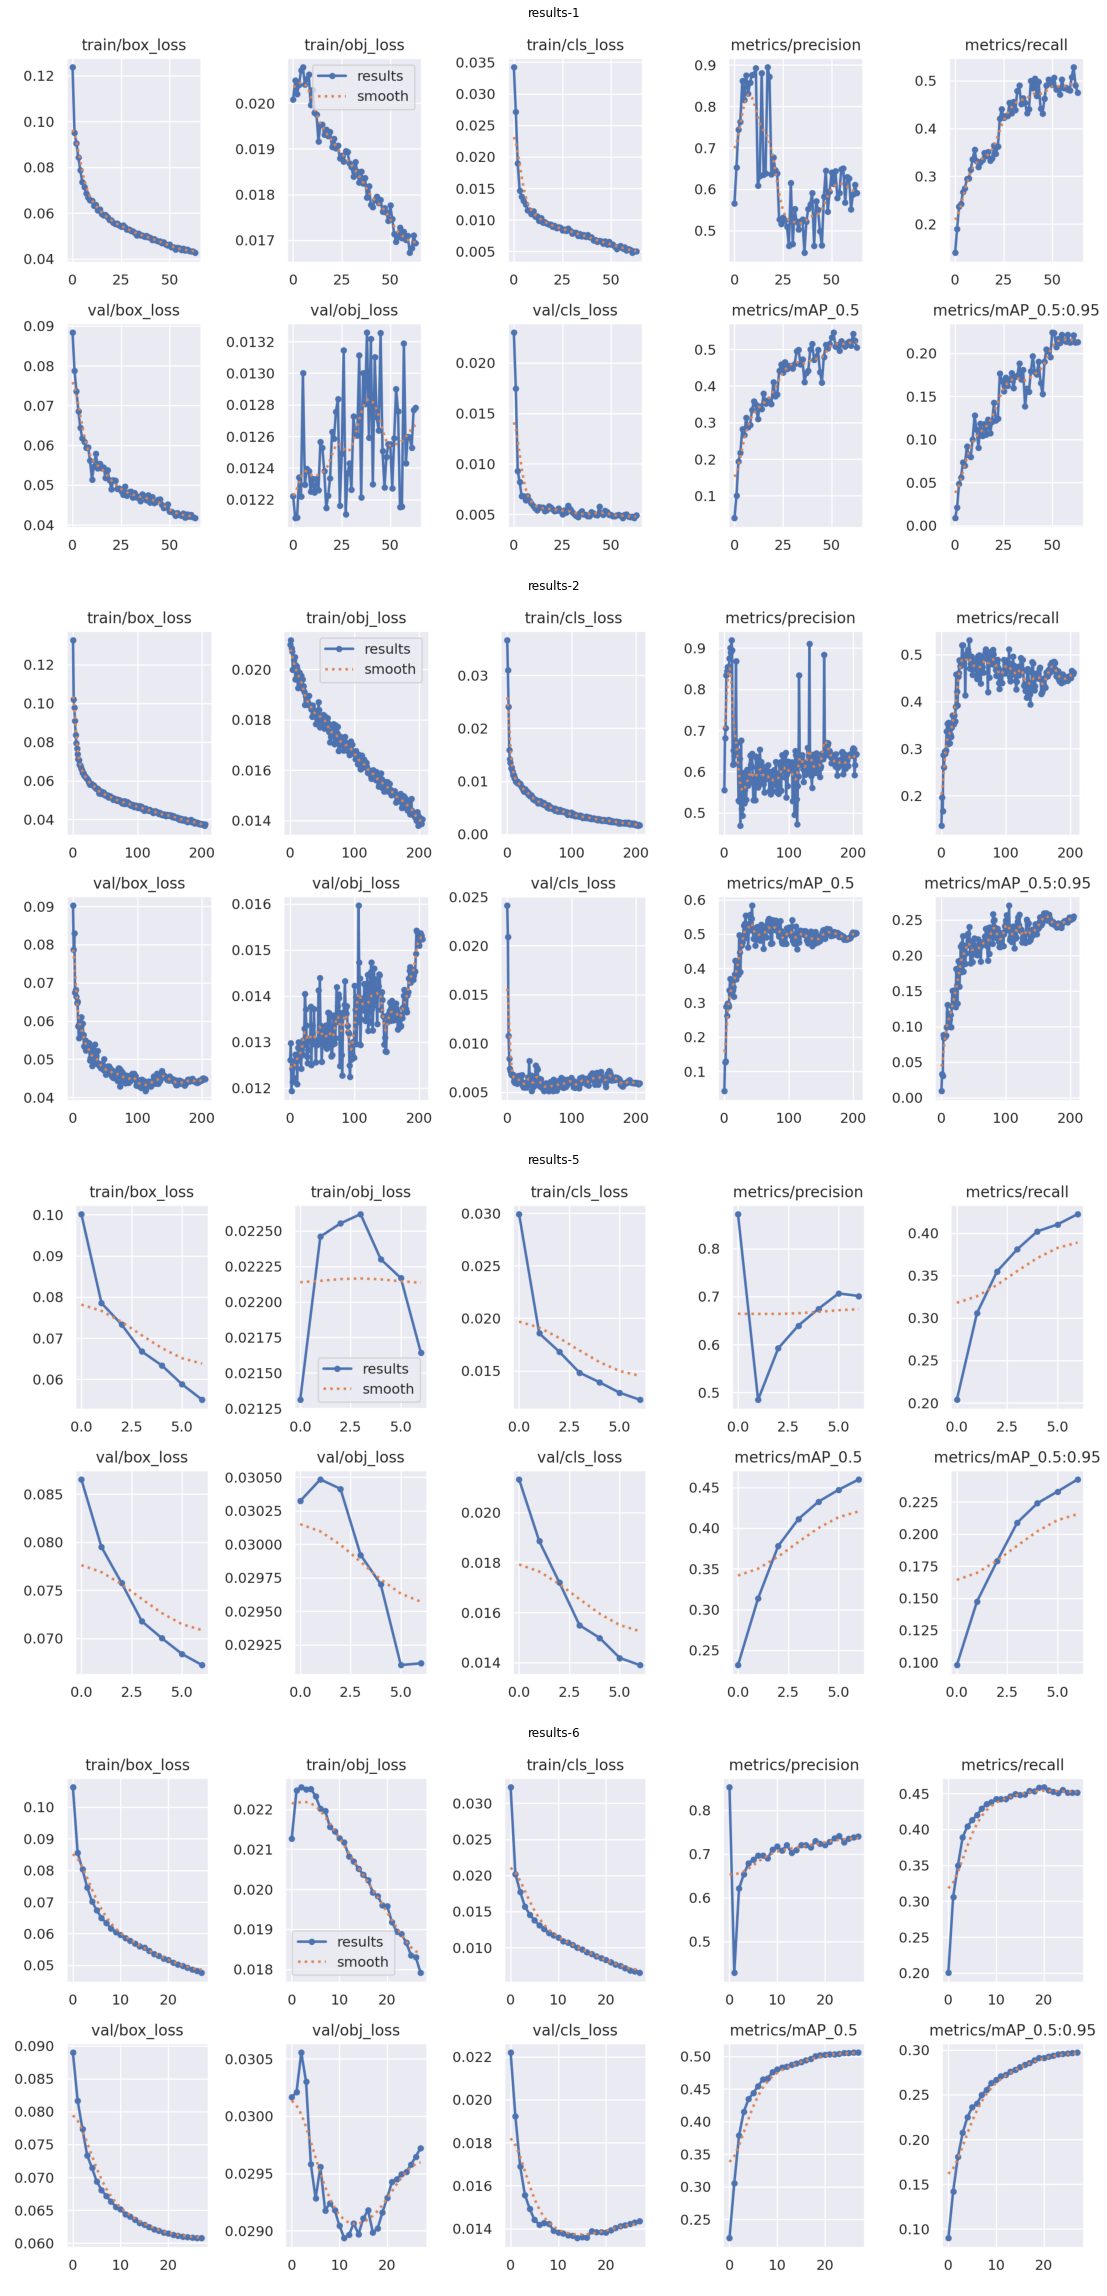

In [31]:
%cd {BASE_DIR}


def display_images_with_titles(image_dir):
    # List all image files in the directory and sort them alphabetically
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])

    # Calculate the number of rows and columns for the grid
    num_images = len(image_files)
    num_cols = 1  # You can adjust this as needed
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create a subplot for each image
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 32))

    # Iterate through the images and display them
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            ax.imshow(img)

            # Set the title to the file name (without the file extension)
            file_name = os.path.splitext(image_files[i])[0]
            ax.set_title(file_name)

            ax.axis('off')
        else:
            ax.axis('off')  # Turn off empty subplots if there are fewer images

    # Adjust spacing and display the grid of images
    plt.tight_layout()
    plt.show()

# Usage example:
image_directory = "Evaluation/Train_Data"  # Change this to your directory path
display_images_with_titles(image_directory)


#### Confusion Matrix
The follwowing function shows the confusion matrices of all 8 experiments.

Please note, YOLOs loss function constitutes an object_loss function which is basically the binary cross entropy to differentiate between an object and the background. This helps with localising and counting the objects on an image. That is why there is a "background" class attached within the confusion matrix along with the other classes.

/home/jovyan/acdc/topics/05-Traffic-Light-Detection


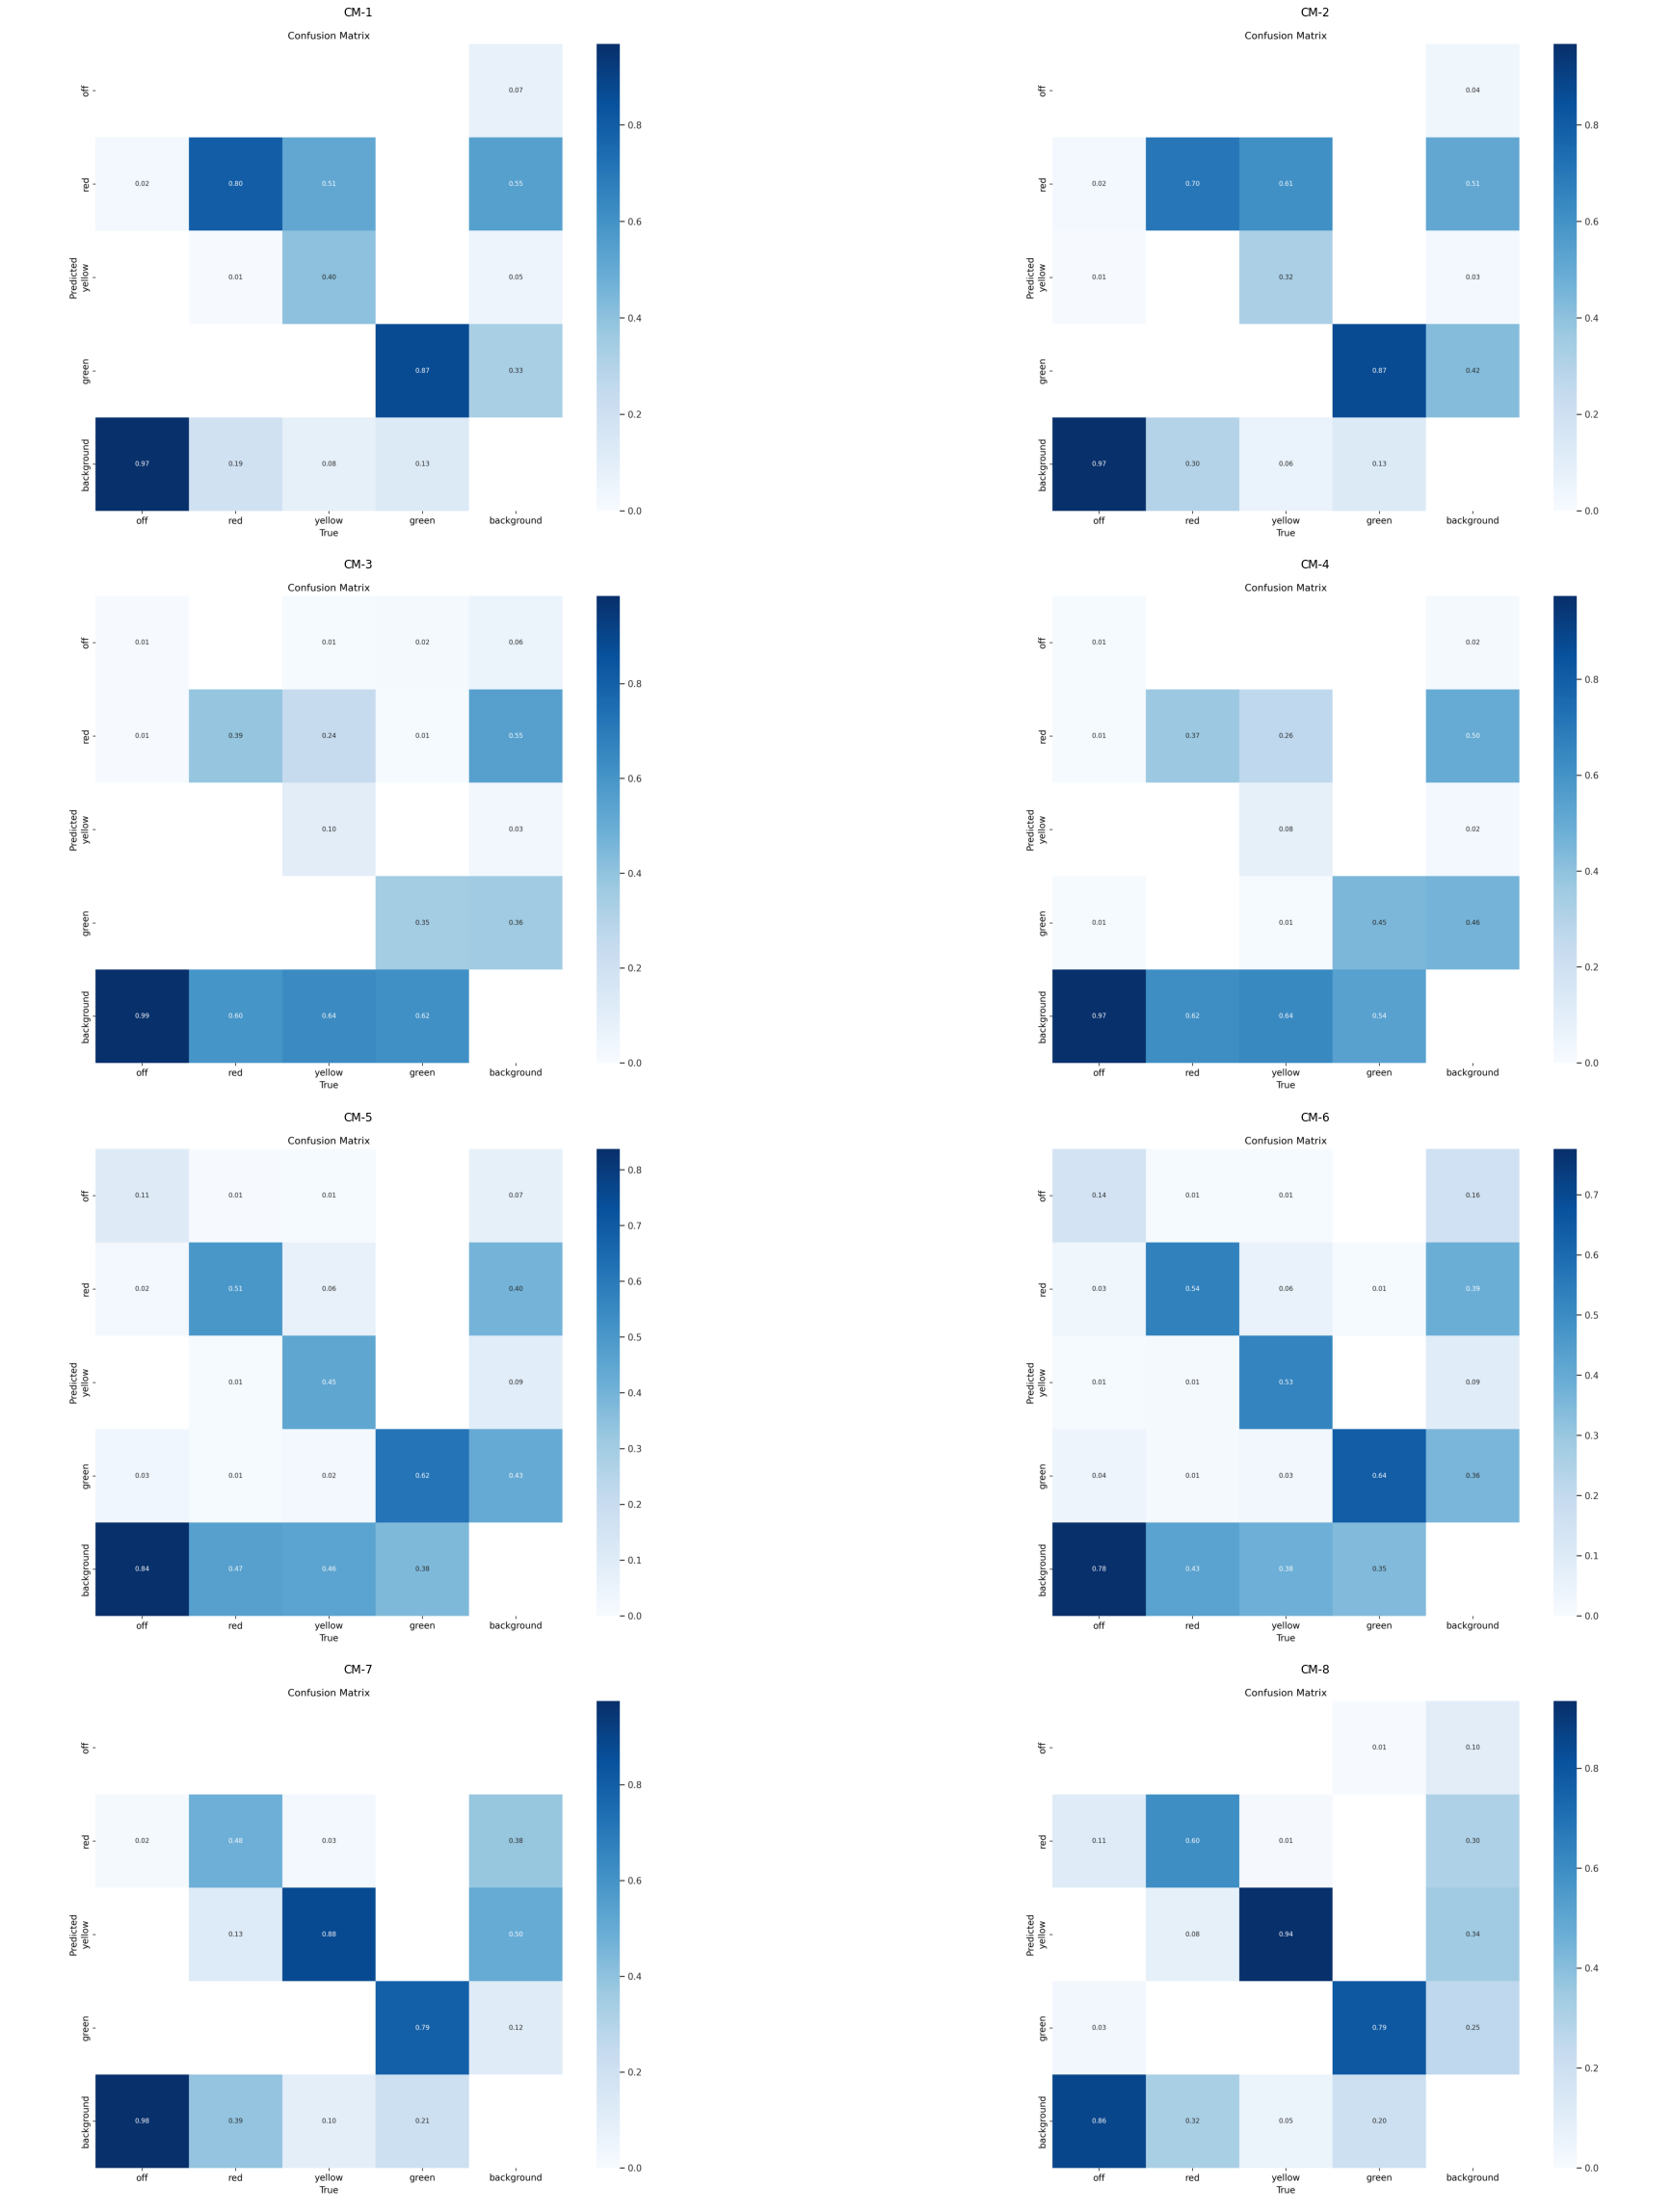

In [29]:
%cd {BASE_DIR}


def display_images_with_titles(image_dir):
    # List all image files in the directory and sort them alphabetically
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])

    # Calculate the number of rows and columns for the grid
    num_images = len(image_files)
    num_cols = 2  # You can adjust this as needed
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create a subplot for each image
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 32))

    # Iterate through the images and display them
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            ax.imshow(img)

            # Set the title to the file name (without the file extension)
            file_name = os.path.splitext(image_files[i])[0]
            ax.set_title(file_name)

            ax.axis('off')
        else:
            ax.axis('off')  # Turn off empty subplots if there are fewer images

    # Adjust spacing and display the grid of images
    plt.tight_layout()
    plt.show()

# Usage example:
image_directory = "Evaluation/Confusion Matrix"  # Change this to your directory path
display_images_with_titles(image_directory)


#### Precision Recall curve
The follwowing function shows the Precision Recall curves of all 8 experiments.

Please note, mAP50 is used here.

/home/jovyan/acdc/topics/05-Traffic-Light-Detection


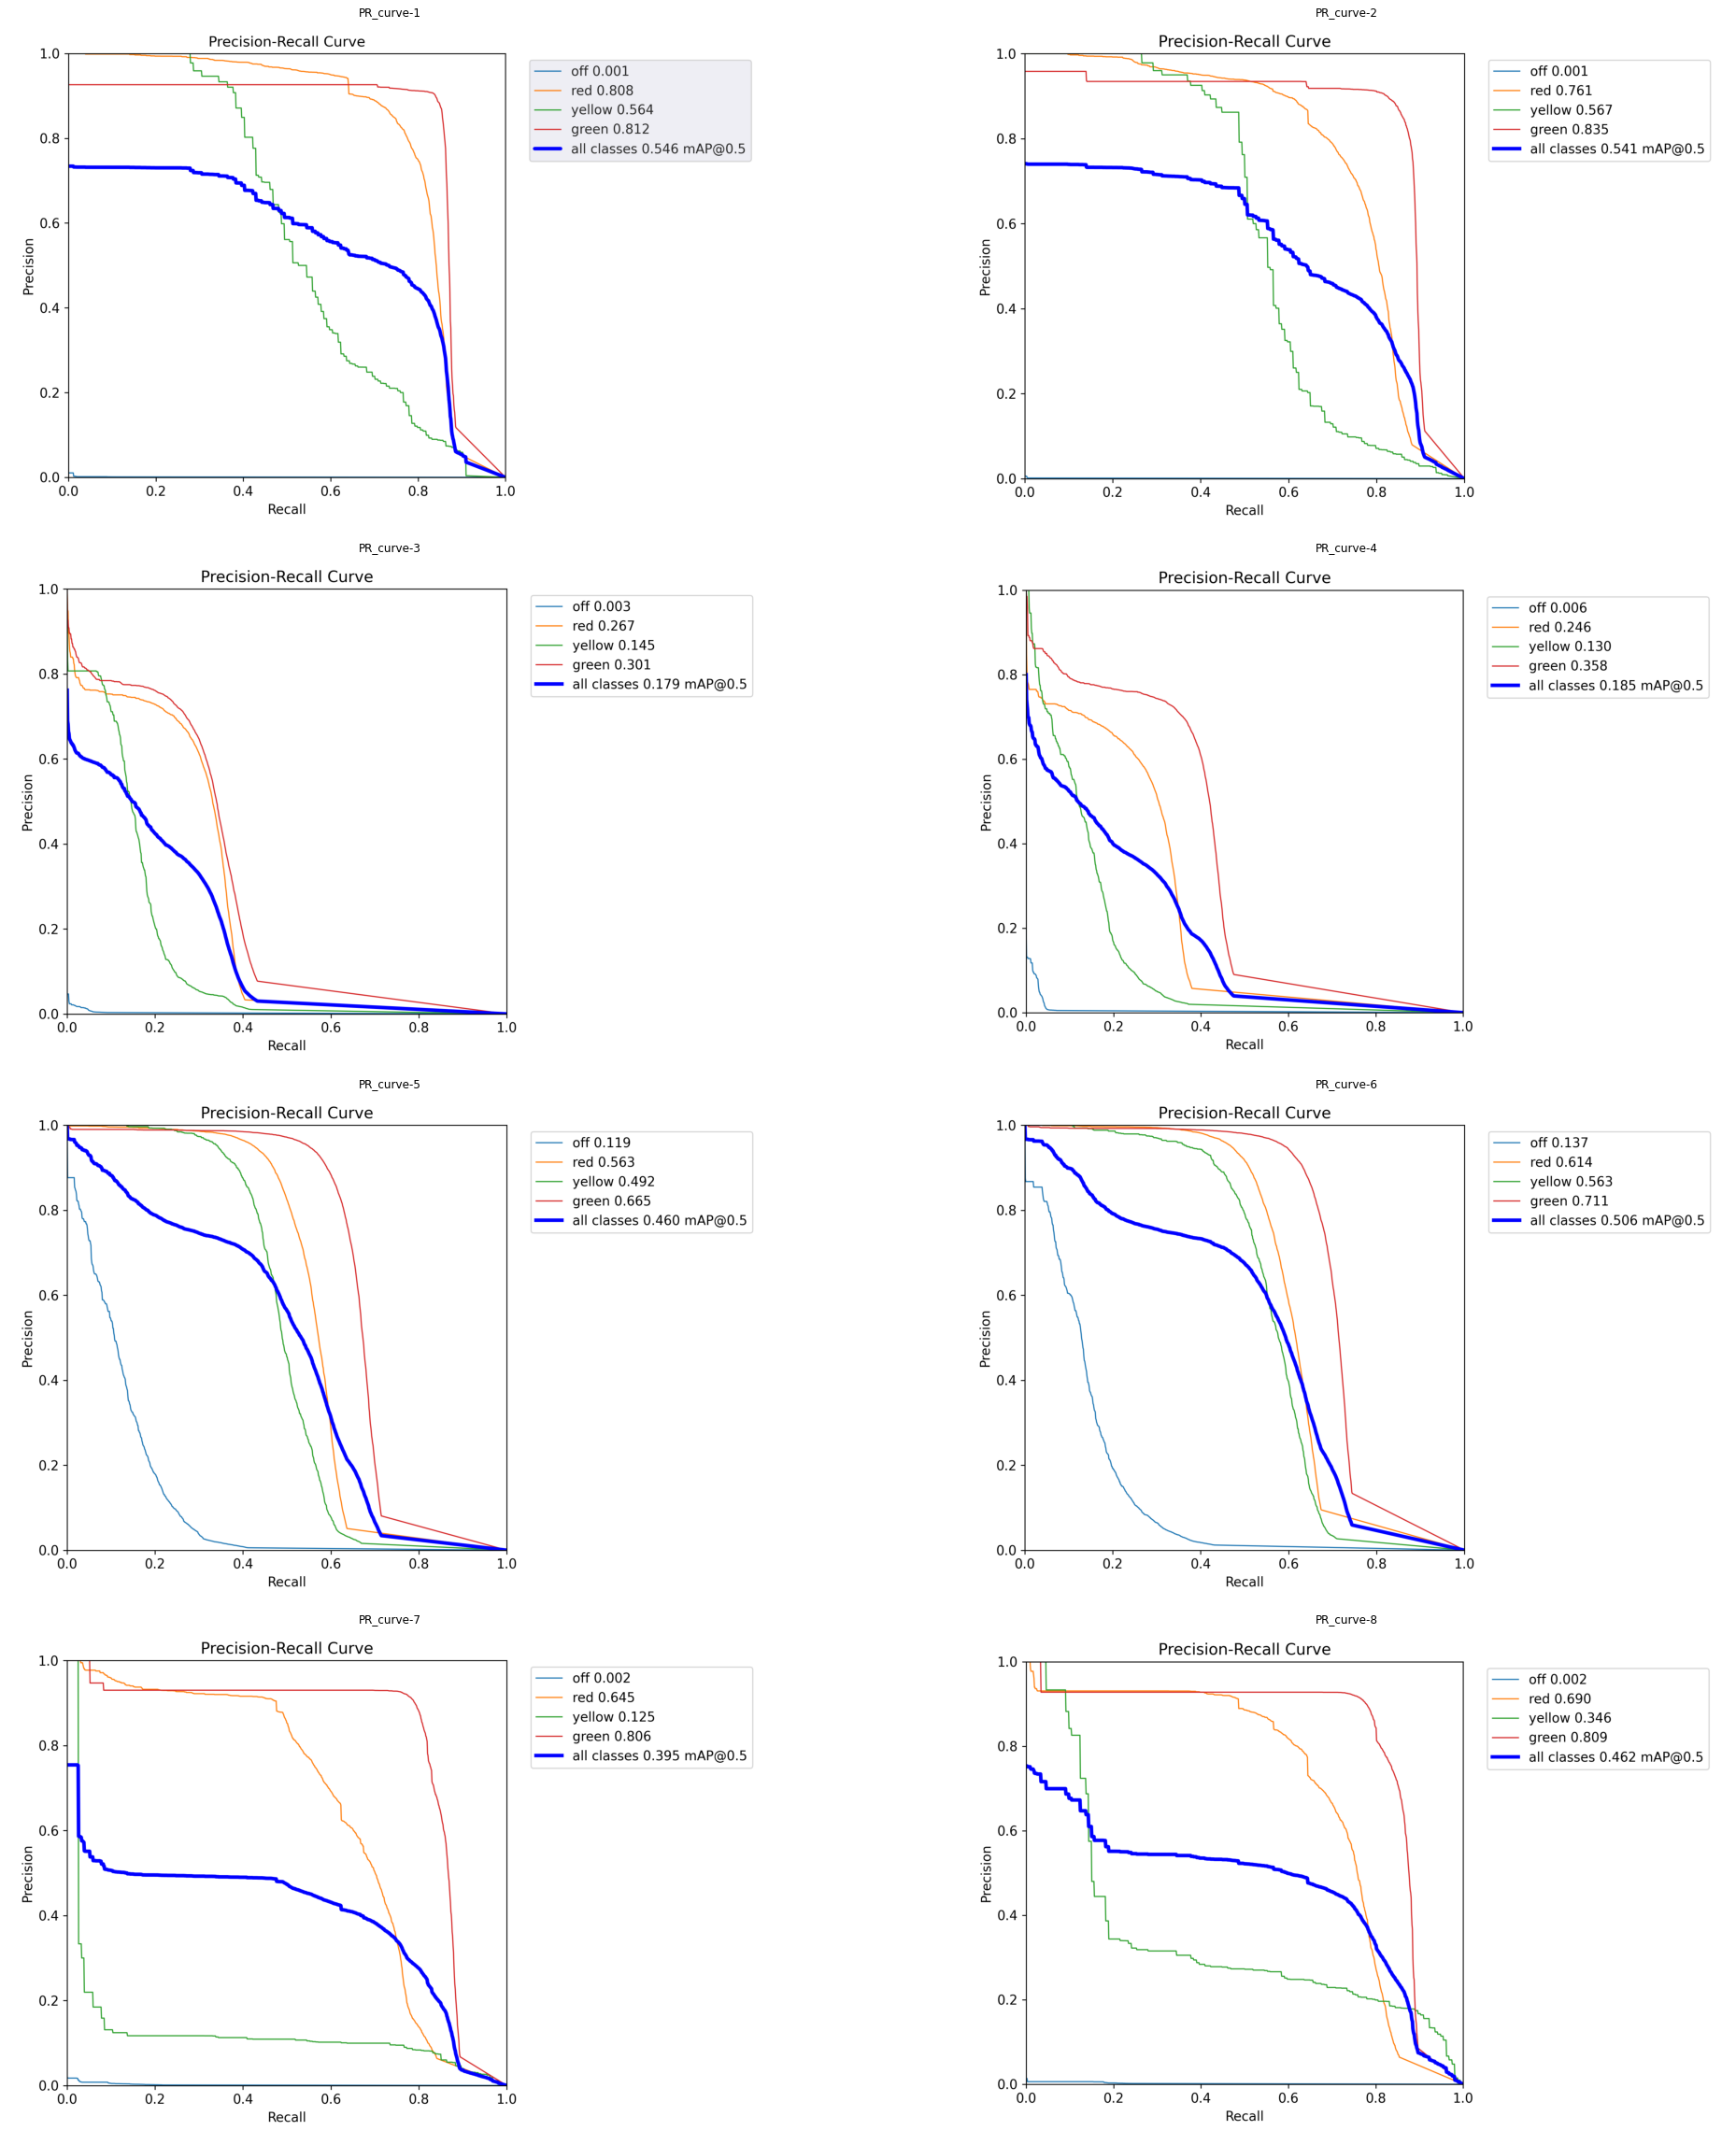

In [27]:
%cd {BASE_DIR}

def display_images_with_titles(image_dir):
    # List all image files in the directory and sort them alphabetically
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])

    # Calculate the number of rows and columns for the grid
    num_images = len(image_files)
    num_cols = 2  # You can adjust this as needed
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create a subplot for each image
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 32))

    # Iterate through the images and display them
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            ax.imshow(img)

            # Set the title to the file name (without the file extension)
            file_name = os.path.splitext(image_files[i])[0]
            ax.set_title(file_name)

            ax.axis('off')
        else:
            ax.axis('off')  # Turn off empty subplots if there are fewer images

    # Adjust spacing and display the grid of images
    plt.tight_layout()
    plt.show()

# Usage example:
image_directory = "Evaluation/PR_Curve"  # Change this to your directory path
display_images_with_titles(image_directory)


#### F1 Curve
The follwowing function shows the F1 Confidence curves of all 8 experiments.



/home/jovyan/acdc/topics/05-Traffic-Light-Detection


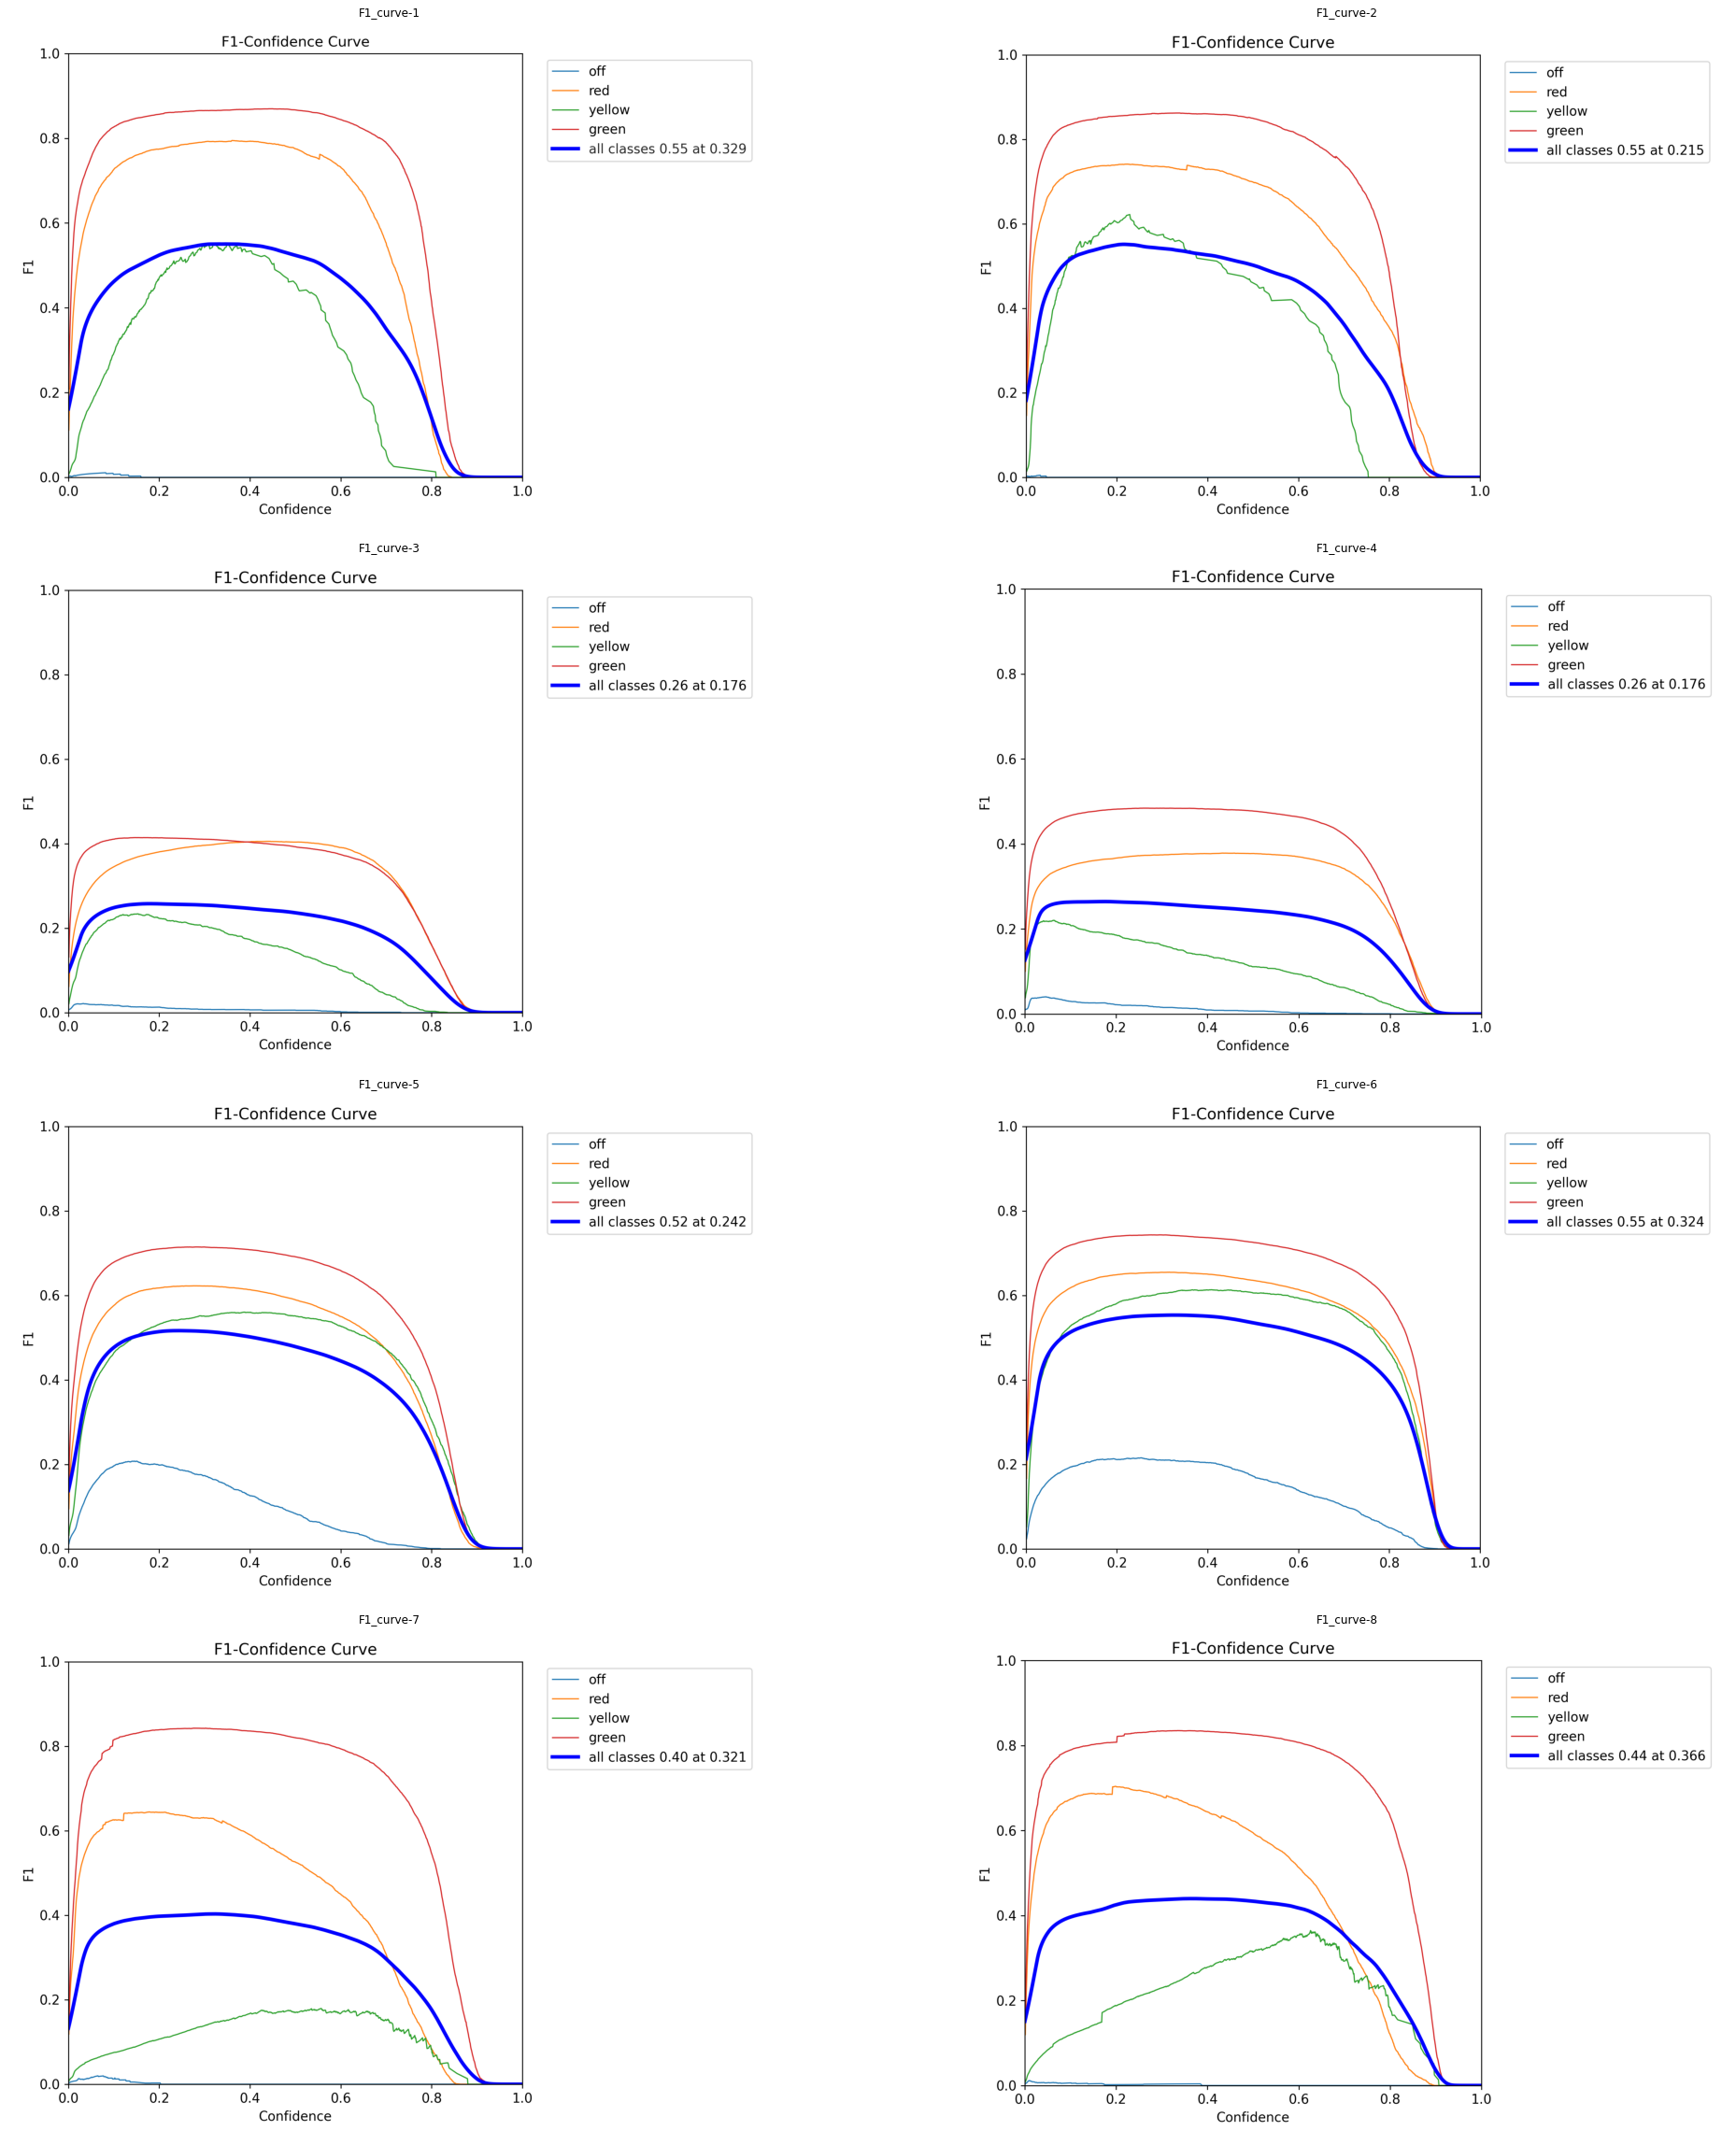

In [28]:
%cd {BASE_DIR}


def display_images_with_titles(image_dir):
    # List all image files in the directory and sort them alphabetically
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])

    # Calculate the number of rows and columns for the grid
    num_images = len(image_files)
    num_cols = 2  # You can adjust this as needed
    num_rows = (num_images + num_cols - 1) // num_cols

    # Create a subplot for each image
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(32, 32))

    # Iterate through the images and display them
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img_path = os.path.join(image_dir, image_files[i])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            ax.imshow(img)

            # Set the title to the file name (without the file extension)
            file_name = os.path.splitext(image_files[i])[0]
            ax.set_title(file_name)

            ax.axis('off')
        else:
            ax.axis('off')  # Turn off empty subplots if there are fewer images

    # Adjust spacing and display the grid of images
    plt.tight_layout()
    plt.show()

# Usage example:
image_directory = "Evaluation/F1_Curve"  # Change this to your directory path
display_images_with_titles(image_directory)


# Evaluation:

- From Table 3, it can be seen that models trained on DTLD outperforms the models trained on BSTLD, even testing on BSTLD dataset. However, some mAP values shown on table may give false overview. e.g in experiment no. 7, the mAP for the class `òff` is 1 but if we closely look on the confusion matrix of the corresponding experiment, we can see no predictions were even made for that class. A further review on the PR_curve based on mAP50 clarifies the issue.

- Model trained on BSTLD performs really well on its own test set, but performance drops drastically when tested on DTLD test set. All the evaluation metrics from Experiment 3 and 4 denotes this clearly.

- Model trained on BSTLD can hardly detect `off` class in all cases. However, DTLD trained model does fairly well on its own test set, but poorly on BSTLD test set. Which denotes, not only the `off` classses are under represented, but also the labelings are not good enough.

- A traffic light system is intolerant to both FalseNegatives and FalsePositives, the harmonic mean F1-score is a good way to measure overall performance in that case. Much stable performance can also be observed for a DTLD trained model in all scenarios, whereas BSTLD performs poorly when tested on DTLD test set.

# Comparision

The author in [<a href="#ref17">17</a>] highlighted some of his best results in testing with both datasets. We will now compare our results with those.

#### Bosch Small Traffic Light Dataset

The performance on test set from BSTLD varied widely. Below are results-

| #   |   Model     | Train Data |Batch Size | Weighted mAP |    mAP | Off    | Green  | Yellow | Red    |
| --- | ----------- | ------- | --------- | ------------ | ------ | ------ | ------ | ------ | ------ |
|   1 |   YOLOv5s   | BSTLD(f)|   1       | 0.8357       | 0.608  | 0.0    | 0.889  | 0.71   | 0.833  |
|   2 |   YOLOv5s   | BSTLD(f)|   4       | 0.8016       | 0.624  | 0.0    | 0.857  | 0.853  | 0.788  |
|   3 |   YOLOv5s   | DTLD    |   1       | 0.8913(0.85) | 0.717(0.467)| 1(0)   | 0.913  | 0.079  | 0.875  |
|   4 |   YOLOv5s   | DTLD    |   4       | 0.8580       | 0.488  | 0.0116 | 0.907  | 0.154  | 0.879  |
|   5 |SSD Mobilenet| BSTLD(f)|   4       | 0.5684       | 0.3674 | 0.0001 | 0.666  | 0.3383 | 0.4653 |
|   6 |SSD Mobilenet| BSTLD(f)|   1       | 0.1996       | 0.1054 | 0.0    | 0.3096 | 0.0001 | 0.1118 |
|   7 |SSD Mobilenet| DTLD    |   4       | 0.5517       | 0.3594 | 0.0    | 0.6519 | 0.3121 | 0.4736 |

*Note: (f) denotes filtered*

__Summary__: Based on the mAP and Weighted mAP, Yolov5 outperforms other models in all of the occasions. All the Yolo models performed almost equally, but model trained on DTLD with batch size of 4, achieved the best result  

#### DriveU Traffic Light Dataset

The performance on test set from DTLD varied widely. Below are results-

| #   |   Model     | Train Data |Batch Size | Weighted mAP |    mAP | Off    | Green  | Yellow | Red    |
| --- | ----------- | ------- | --------- | ------------ | ------ | ------ | ------ | ------ | ------ |
|   1 |   YOLOv5s   | BSTLD(f)|   1       | 0.4900       | 0.383  | 0.0227 | 0.604  | 0.487  | 0.42   |
|   2 |   YOLOv5s   | BSTLD(f)|   4       | 0.4772       | 0.397  | 0.105  | 0.577  | 0.501  | 0.405  |
|   3 |   YOLOv5s   | DTLD    |   1       | 0.8079       |  0.702 | 0.466  | 0.865  | 0.662  | 0.814  |
|   4 |   YOLOv5s   | DTLD    |   4       | 0.8556       |  0.74  | 0.437  | 0.913  | 0.739  | 0.872  |
|   5 | Faster RCNN | DTLD    |   4       | 0.4397       | 0.3947 | 0.0281 | 0.627  | 0.408  | 0.5158 |
|   6 | Faster RCNN | BSTLD(all)|   1     | 0.4054       | 0.3696 | 0.0271 | 0.5964 | 0.383  | 0.472  |

*Note: (f) denotes filtered*

__Summary__: Here also, Yolov5 outperforms other models in all of the occasions. However, DTLD performs better than BSTLD(f) which denotes BSTLD suffers when tested with different region based data. The best result here achieved was by the model trained on DTLD with batch size of 4.

#### Speed Test

| Model |   Hardware (GPU)     | Frame per Speed (FPS) |
| ----- | ----------- | ------- |
| YOLOv5s(BSTLD) | RTX 3060 Laptop  | 57 |
|   YOLOv5s(DTLD) | RTX 3060 Laptop  | 59| 
| SSD Mobilenet | RTX 2070   |       50  |
| Faster RCNN Inception | RTX 2070   | 22  |

__Summary__: when tested on some random images, both YOLOv5 models showed better FPS.

# Limitation

- This study only used the resulting data from [<a href="#ref17">17</a>]. Parameters for Faster RCNN and SSD are unknown. For better comparision a real experiments should have been done.

- DTLD has different aspects (e.g one aspect) and pictograms (e.g. trams) in its dataset, which are not present in BSTLD. For better comparision between DTLD and BSTLD those should also be filtered.

- For simplicity, default parameters of YOLOv5 were used. No fine tuning was done which could potentially lead to improved performance.

- No significant augmentation was applied(check yolov5 default parameter) which could potentially handle the under representation of some classes. There may also be some mislabelings within the dataset which needs more sophiscated pre-processing steps.

# Conclusion

In this study, a traffic light detection system based on YOLOv5 was explored, which proved to be a reliable computer vision methodologies. The findings and contributions can be summarized as follows:

The Main goal of this paper was to compare Yolov5's performance on traffic light detection in comparision to Faster RCNN and SSD based models under similar circumstances and it is clearly evident that YOLOv5 achieved the best results. Models were trained and evaluated on two diverse datasets BSTLD and DTLD with a fixed global steps. In all scenarios DTLD outperformed BSTLD highlighting the dataset's diversity and robustness during cross-regional adaptations. However, an additional pre-processing (unknown label filtering) step was done to DTLD, which could be the reason behind DTLD's lack of performance in [<a href="#ref17">17</a>] which emphasizes the need for further research in this area. 

While the result exhibits YOLOv5's superior performance compared to the alternative models, its practical suitability for real-world applications remains low. A fine tuning is absolute necessery in such case. Moreover, all the models experienced a significant performance drop when tested in entirely different scenarios or under varying lighting conditions. This underscores the importance of applying augmentation techniques and incorporating a more diverse dataset to enhance model robustness. 

To conclude, YOLOv5 demonstrated superior performance in traffic light detection, highlighting the need for continued research to enhance real-world applicability and dataset preprocessing methods.

## References

| # | Year | Authors | Title |
| --- | --- | --- | --- |
| <a id="ref1"></a> 1 | 2015 | Shaoqing Ren, Kaiming He, Ross Girshick, Jian Sun | [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497) |
| <a id="ref2"></a> 2 | 2015 | Wei Liu, Dragomir Anguelov, Dumitru Erhan, Christian Szegedy, Scott Reed, Cheng-Yang Fu, Alexander C. Berg | [SSD: Single Shot MultiBox Detector](https://arxiv.org/abs/1512.02325) |
| <a id="ref3"></a> 3 | 2016 | Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi | [You Only Look Once: Unified, Real-Time Object Detection](https://ieeexplore.ieee.org/document/7780460) |
| <a id="ref4"></a> 4 | 2017 | Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam | [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/abs/1704.04861) |
| <a id="ref5"></a> 5 | 2015 | C. Szegedy, W. Liu, Y. Jia, P. Sermanet, S. Reed, D. Anguelov, et al. | [Going deeper with convolutions](https://ieeexplore.ieee.org/document/7298594) |
| <a id="ref6"></a> 6 | 2015 | Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun | [Deep Residual Learning for Image Recognition](https://ieeexplore.ieee.org/document/7780459) |
| <a id="ref7"></a> 7 | 2015 | Karen Simonyan, Andrew Zisserman | [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) |
| <a id="ref8"></a> 8 | 2020 | Jocher, G. | [YOLOv5 by Ultralytics (Version 7.0) Computer software](https://doi.org/10.5281/zenodo.3908559) |
| <a id="ref9"></a> 9 | 2009 | R. de Charette and F. Nashashibi | [Real time visual traffic lights recognition based on Spot Light Detection and adaptive traffic lights templates](https://ieeexplore.ieee.org/document/5164304) |
| <a id="ref10"></a> 10 | 2015 |  | [VIVA Traffic Light Detection Challenge 2015](https://scholar.google.com/scholar?as_q=VIVA+Traffic+Light+Detection+Challenge+2015&as_occt=title&hl=en&as_sdt=0%2C31) |
| <a id="ref11"></a> 11 | 2017 | K. Behrendt, L. Novak and R. Botros | [A deep learning approach to traffic lights: Detection tracking and classification](https://ieeexplore.ieee.org/document/7989163) |
| <a id="ref12"></a> 12 | 2018 | Andreas Fregin, Julian Muller, Ulrich Krebel, Klaus Dietmayer | [The DriveU Traffic Light Dataset: Introduction and Comparison with Existing Datasets](https://ieeexplore.ieee.org/document/8460737) |
| <a id="ref13"></a> 13 | 2009 | Masako Omachi, Shinichiro Omachi | [Traffic light detection with color and edge information](https://ieeexplore.ieee.org/abstract/document/5234518) |
| <a id="ref14"></a> 14 | 2012 | Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton | [ImageNet Classification with Deep Convolutional Neural Networks](https://proceedings.neurips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) |
| <a id="ref15"></a> 15 | 2015 | O. Russakovsky, J. Deng, H. Su, J. Krause, S. Satheesh, S. Ma, Z. Huang, A. Karpathy, A. Khosla, M. Bernstein et al. | [ImageNet Large Scale Visual Recognition Challenge](https://link.springer.com/article/10.1007/s11263-015-0816-y) |
| <a id="ref16"></a> 16 | 2015 | Jonathan Long, Evan Shelhamer, Trevor Darrell | [Fully Convolutional Networks for Semantic Segmentation](https://openaccess.thecvf.com/content_cvpr_2015/html/Long_Fully_Convolutional_Networks_2015_CVPR_paper.html) |
| <a id="ref17"></a> 17 | 2020 | Dennis Hein | [Traffic Light Detection with Convolutional Neural Networks and 2D Camera Data, Bachelors dissertation, fu-berlin](https://www.mi.fu-berlin.de/inf/groups/ag-ki/Theses/Completed-theses/Bachelor-theses/2020/Hein/) |
| <a id="ref18"></a> 18 | 2014 | Tsung-Yi Lin, Michael Maire, Serge Belongie, Lubomir Bourdev, Ross Girshick, James Hays, Pietro Perona, Deva Ramanan, et al. | [Microsoft COCO: Common Objects in Context](https://arxiv.org/abs/1405.0312) |
| <a id="ref19"></a> 19 | 2022 | Sovit Rath | [YOLOv5 – Custom Object Detection Training [Blog post]](https://learnopencv.com/custom-object-detection-training-using-yolov5/) |




# Licence
MIT Licence

Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University